In [1]:
from function.function import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from pandas.core import datetools
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')

/Users/sunghwanki/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 1.EDA

### 1-1 데이터 소개

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
print("Train data : ", train.shape)
print("Test  data : ", test.shape)

Train data :  (1460, 81)
Test  data :  (1459, 80)


In [4]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
1454         Lvl    AllPub      ...                 0        0    NaN    NaN   
1455         Lvl    AllPub      ...                 0        0    NaN    NaN   
1456         Lvl    AllPub      ...                 0        0    NaN    NaN   
1457         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
1458         Lvl    AllPub      ...                 0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[5 rows x 80 columns]

In [6]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

Find : 
1. LotFrontage, MasVnrArea 등 일부 데이터가 missing되었음

### 1-2 타겟 데이터 (SalePrice)

In [7]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

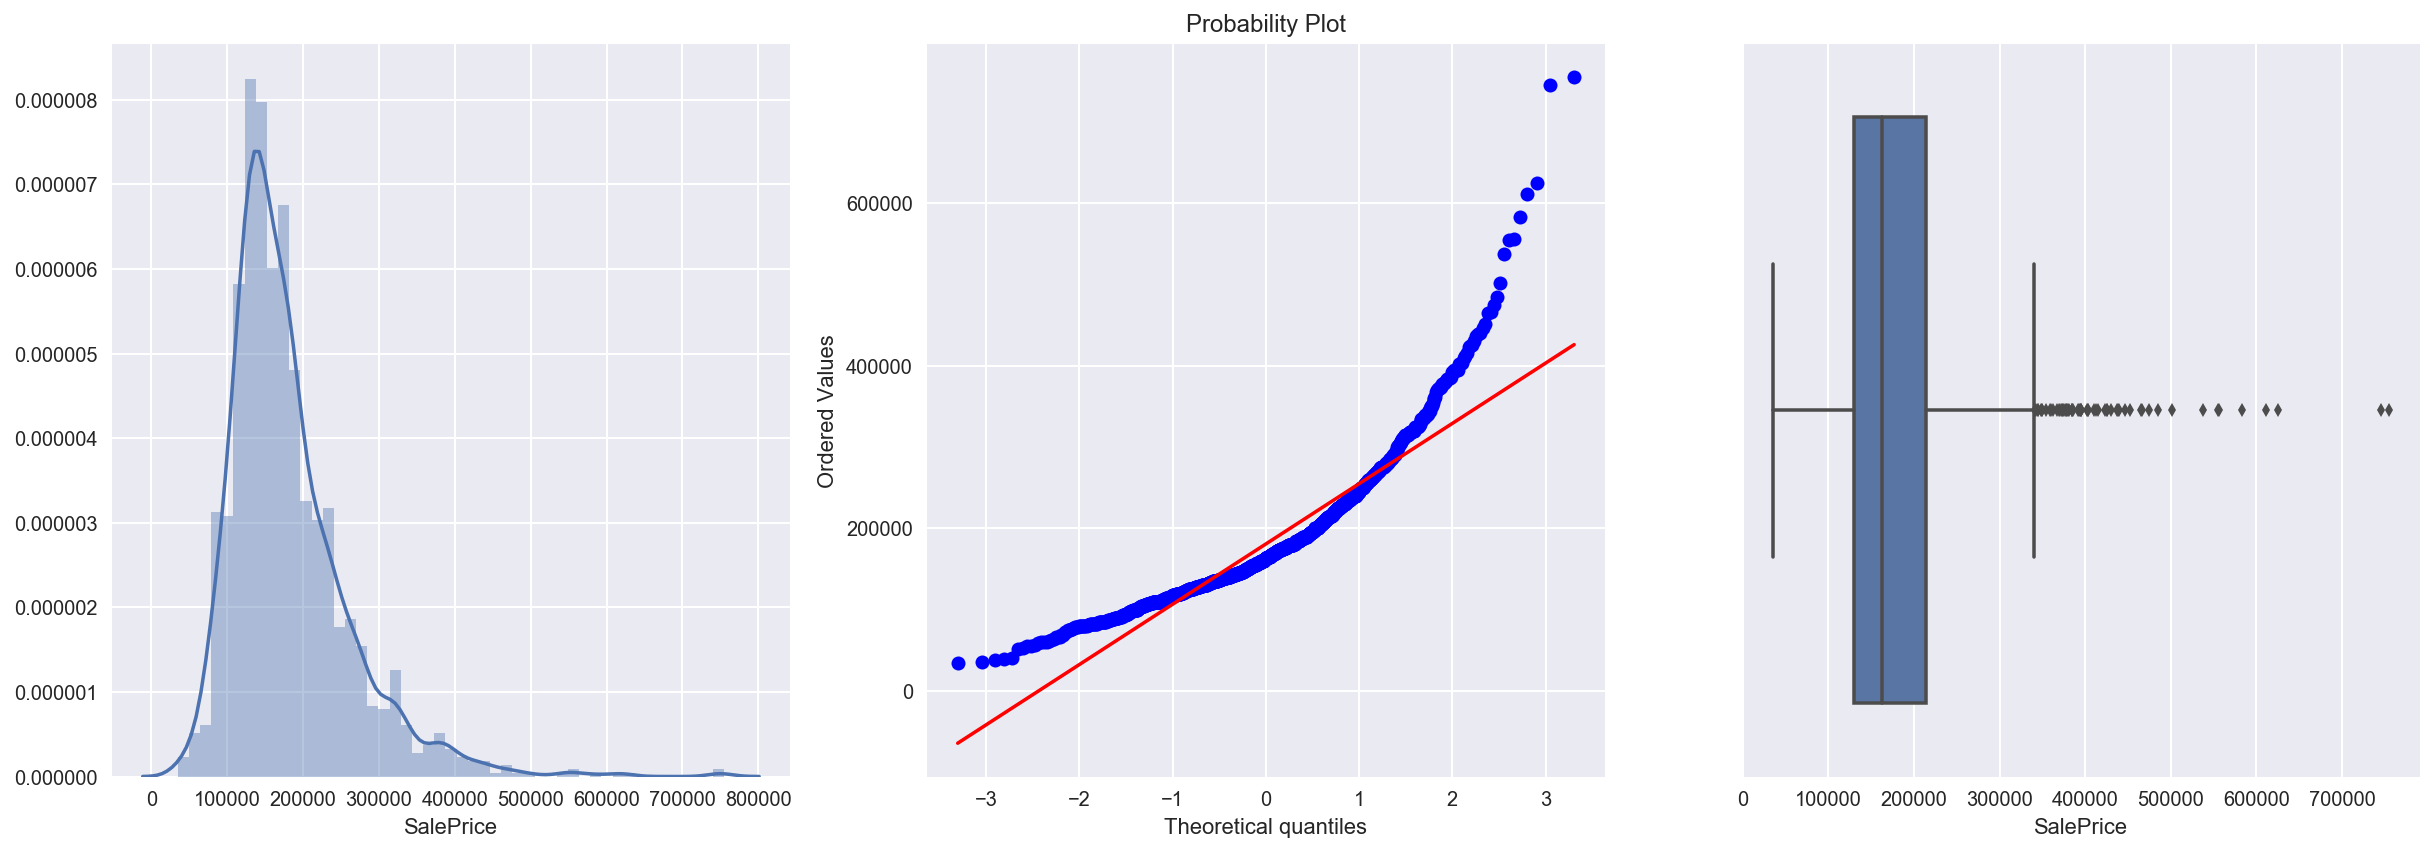

In [8]:
plt.figure(figsize=(17,6))

plt.subplot(131)
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

Find :  
1. 쏠림현상이 있음.
2. log를 사용하여 정규화 작업이 필요함
3. 이상치 처리가 필요함

### 1-3  Analysis the univariance

In [9]:
train["MSSubClass"] = train["MSSubClass"].astype('str')

In [10]:
categorical_columns = ["ExterQual", "ExterCond","BsmtQual", "BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC"]

for c in categorical_columns:
    train[c][(train[c] == "Ex") | (train[c] == "GLQ")] = 10
    train[c][(train[c] == "Gd") | (train[c] == "ALQ")] = 8
    train[c][(train[c] == "TA") | (train[c] == "BLQ")] = 6
    train[c][(train[c] == "Fa") | (train[c] == "Rec")] = 4
    train[c][(train[c] == "Po") | (train[c] == "LwQ")] = 2
    train[c][(train[c] == "NA") | (train[c] == "NaN") |(train[c] == "Unf")] = 0
    train[c] = train[c].astype('float')

In [11]:
# Categoric and Numerical 변수 분리
numerical_features = []
categorical_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numerical_features.append(f)
    else:
        categorical_features.append(f)

In [12]:
print("Numerical Features Qty :", len(numerical_features),"\n")
print("Numerical Features : ", numerical_features, "\n\n")
print("Categorical Features Qty :", len(categorical_features),"\n")
print("Categorical Features :", categorical_features)

Numerical Features Qty : 49 

Numerical Features :  ['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 


Categorical Features Qty : 32 

Categorical Features : ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',

#### Numerical Features with SalePrice

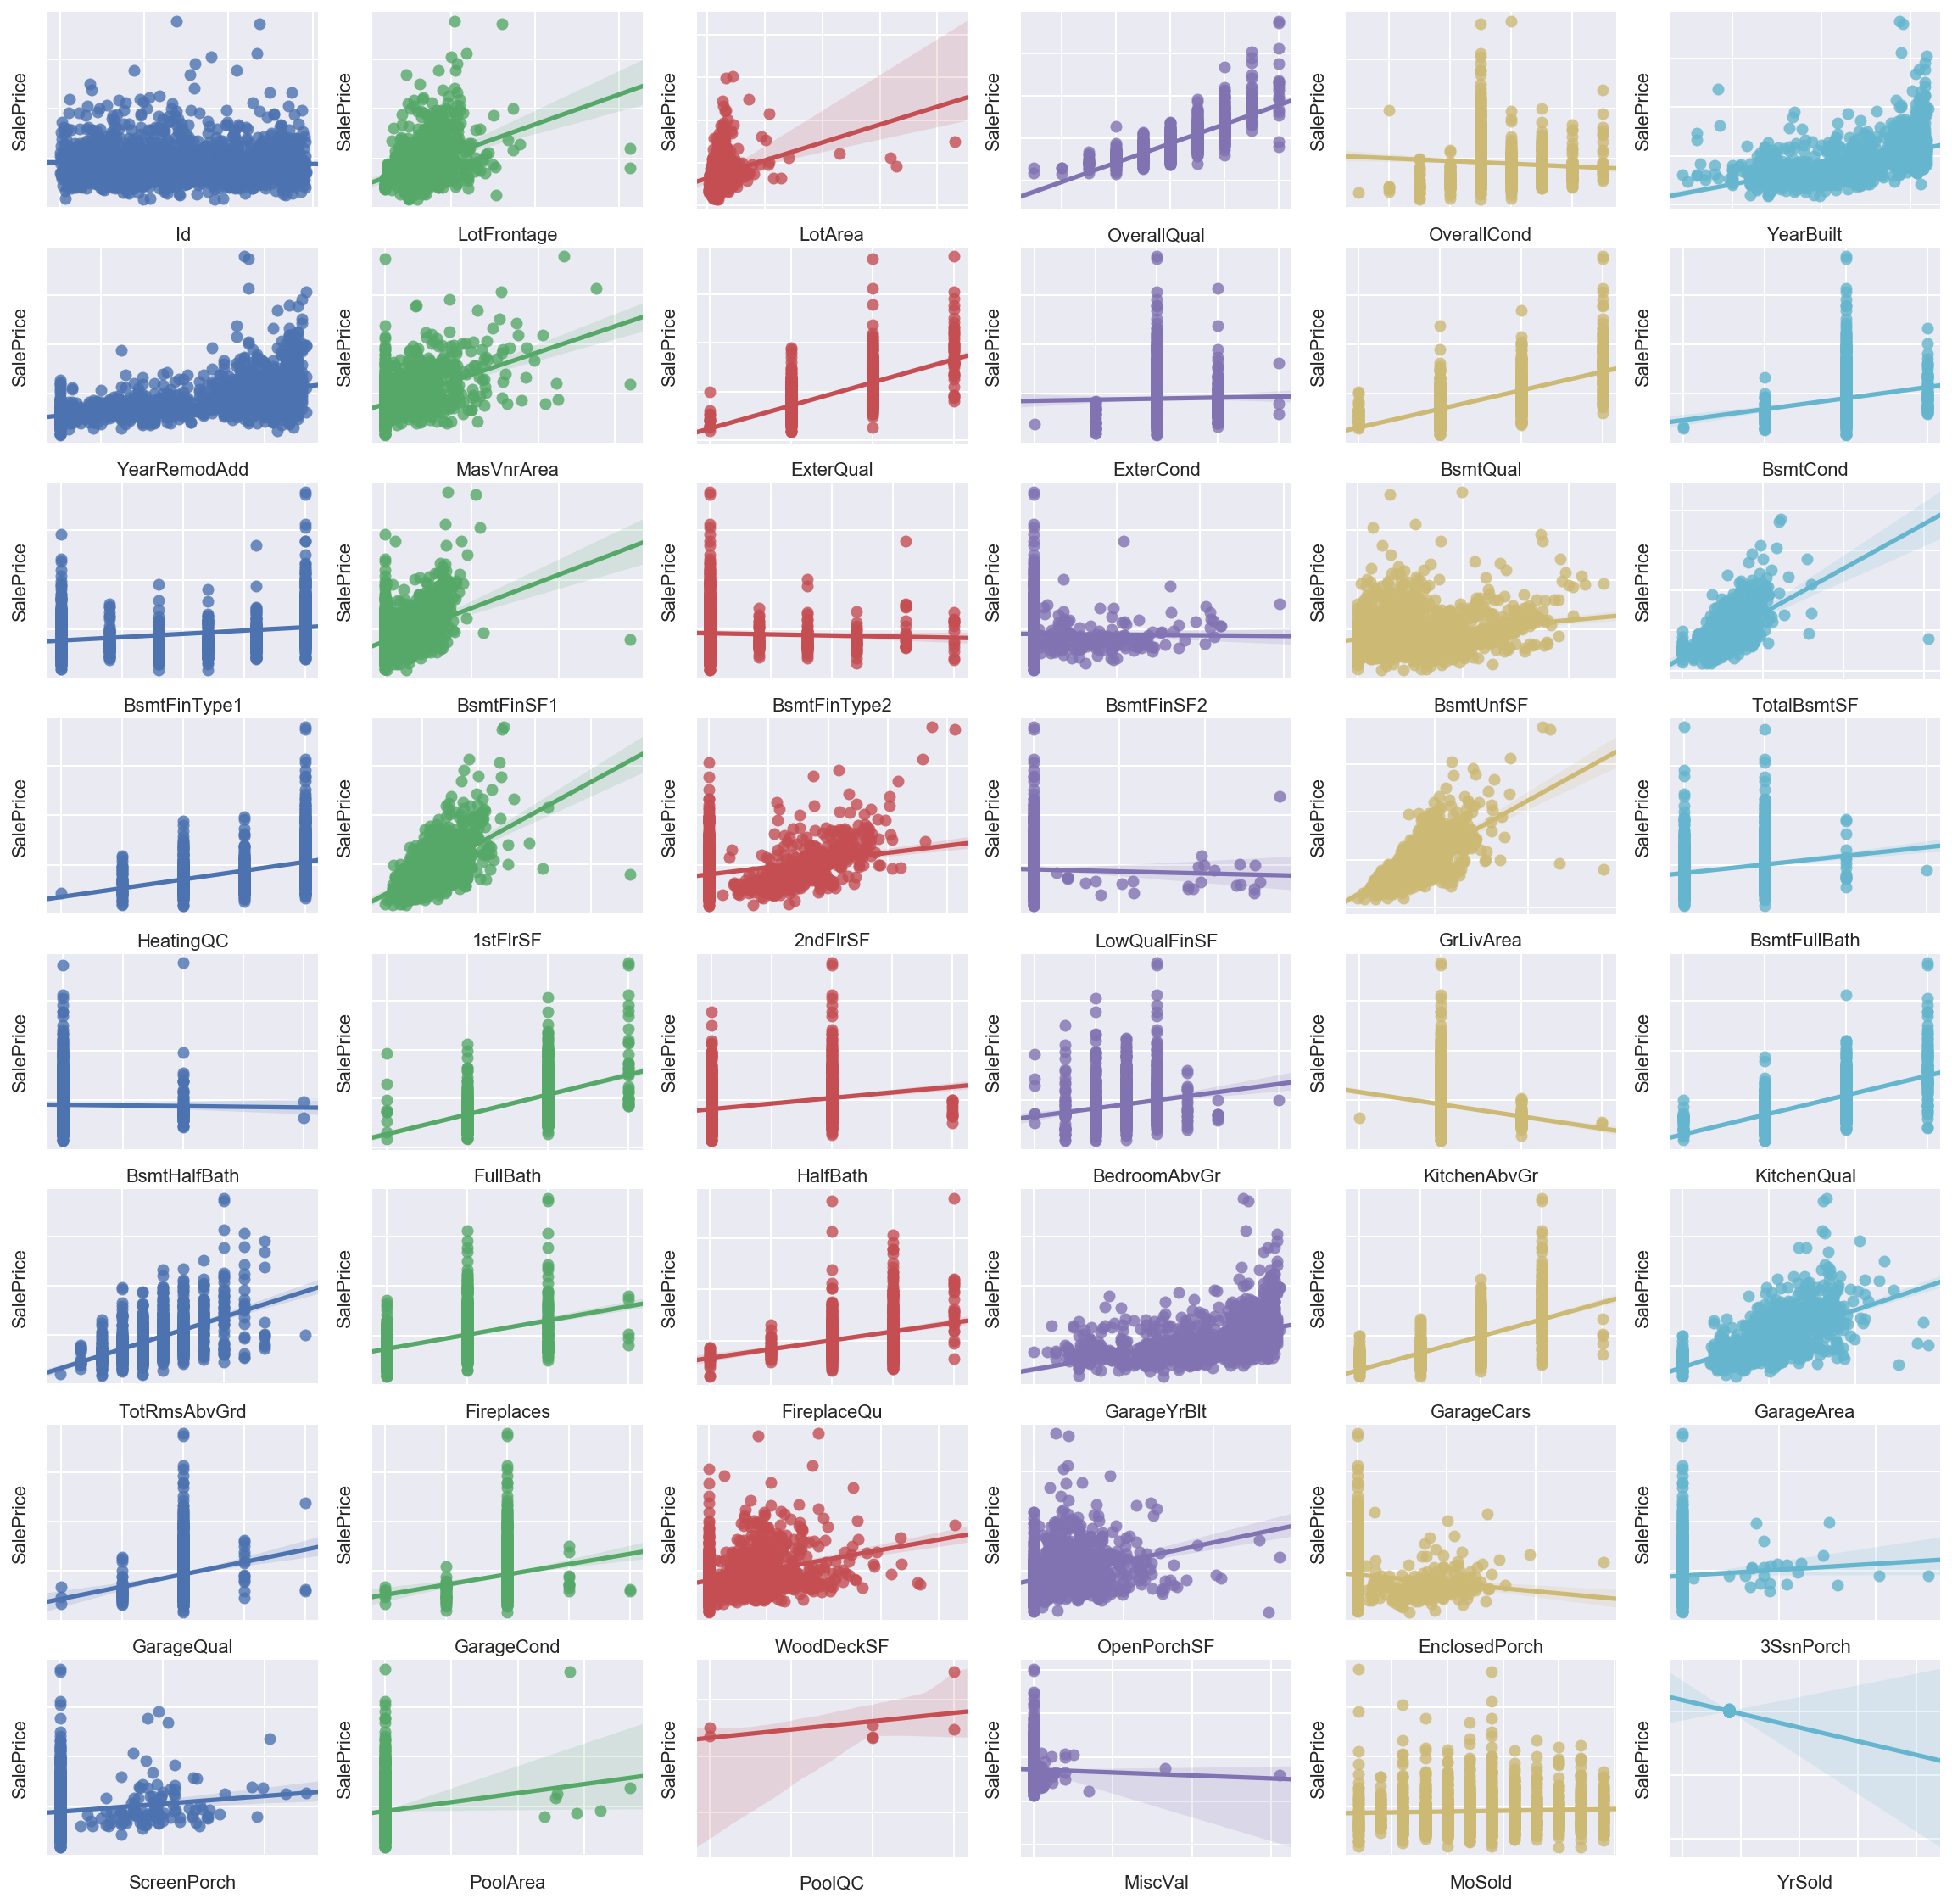

In [13]:
fig, ax = plt.subplots(8,6, figsize = (20,20))

for idx, n in enumerate(numerical_features):
    if n == 'SalePrice':
        continue
    sns.regplot(x=n, y='SalePrice', data=train, ax = ax[idx//6,idx%6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    ax[idx//6, idx % 6].set(xticklabels=[])
    
    continue    

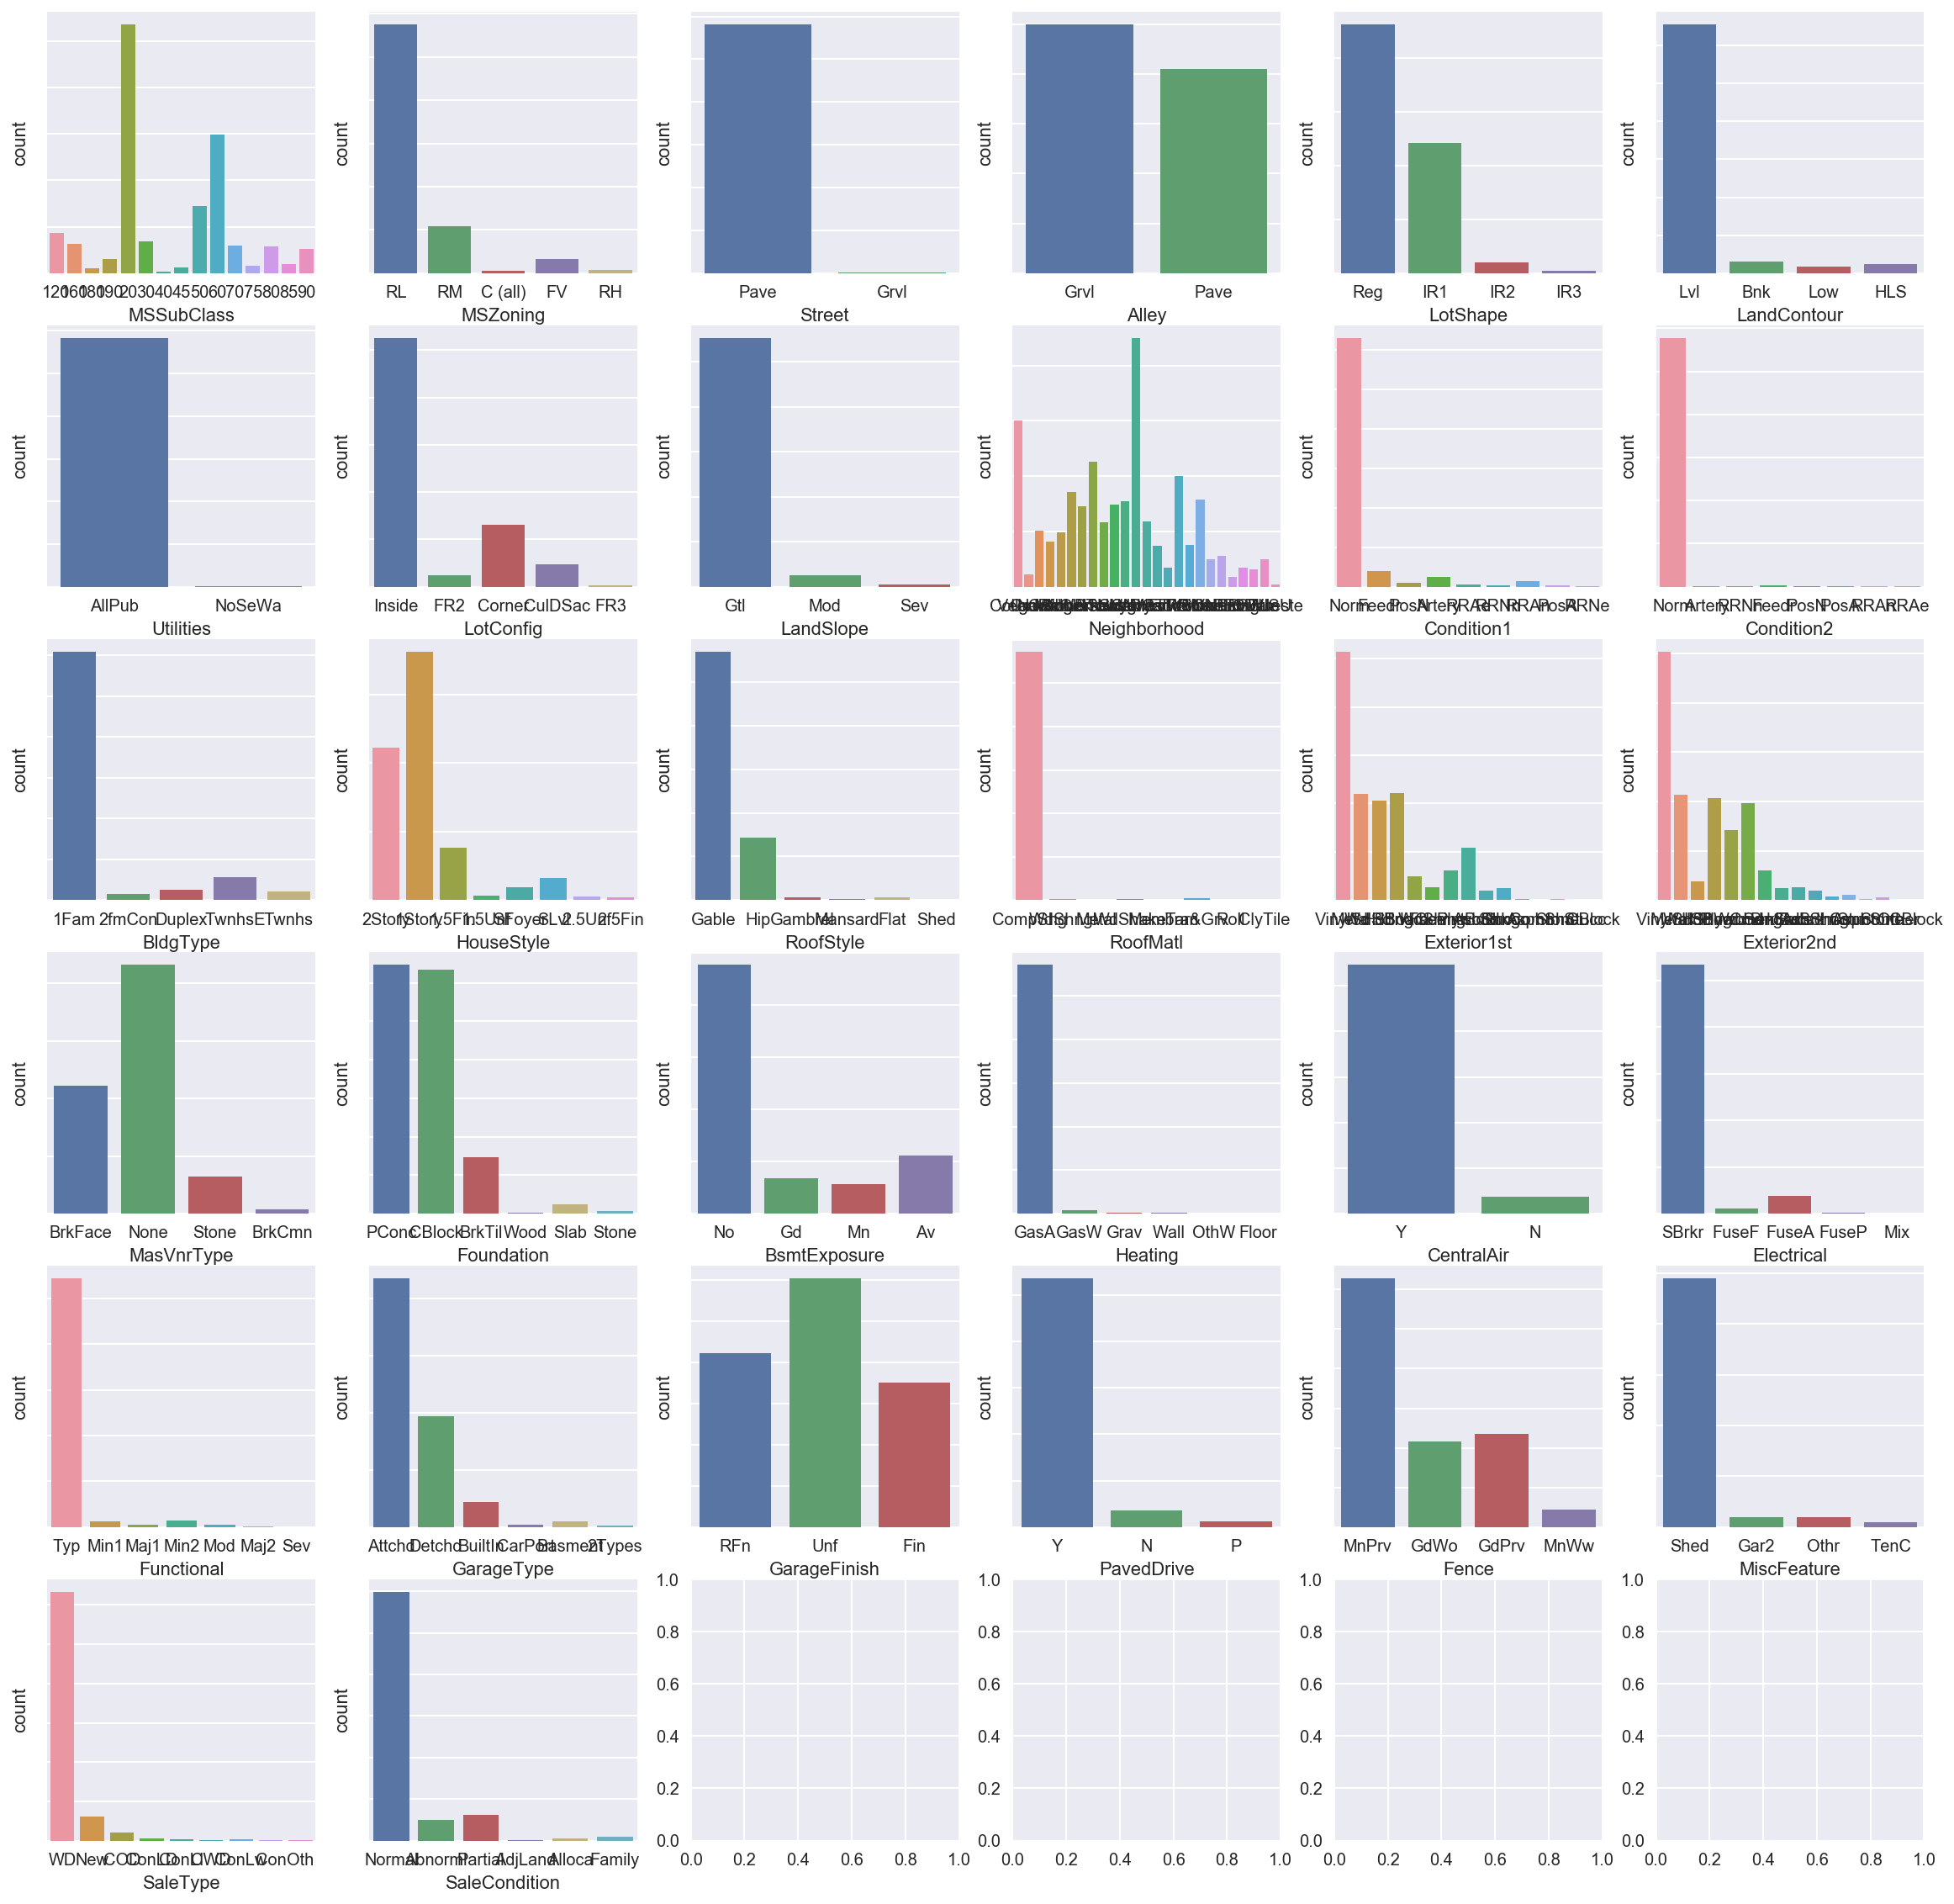

In [14]:
fig, ax = plt.subplots(6,6, figsize = (20,20))

for idx, n in enumerate(categorical_features):
    
    sns.countplot(x=n, data=train, ax = ax[idx//6, idx % 6])
    ax[idx//6, idx % 6].set(yticklabels=[])
    
    continue       

## 2. Feature Engineering

### 2-1 SalePrice와 변수들 간의 관계 및 이상치 제거

#### 2-1-1 GrLivArea  &  2ndFloor & Basement

In [15]:
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

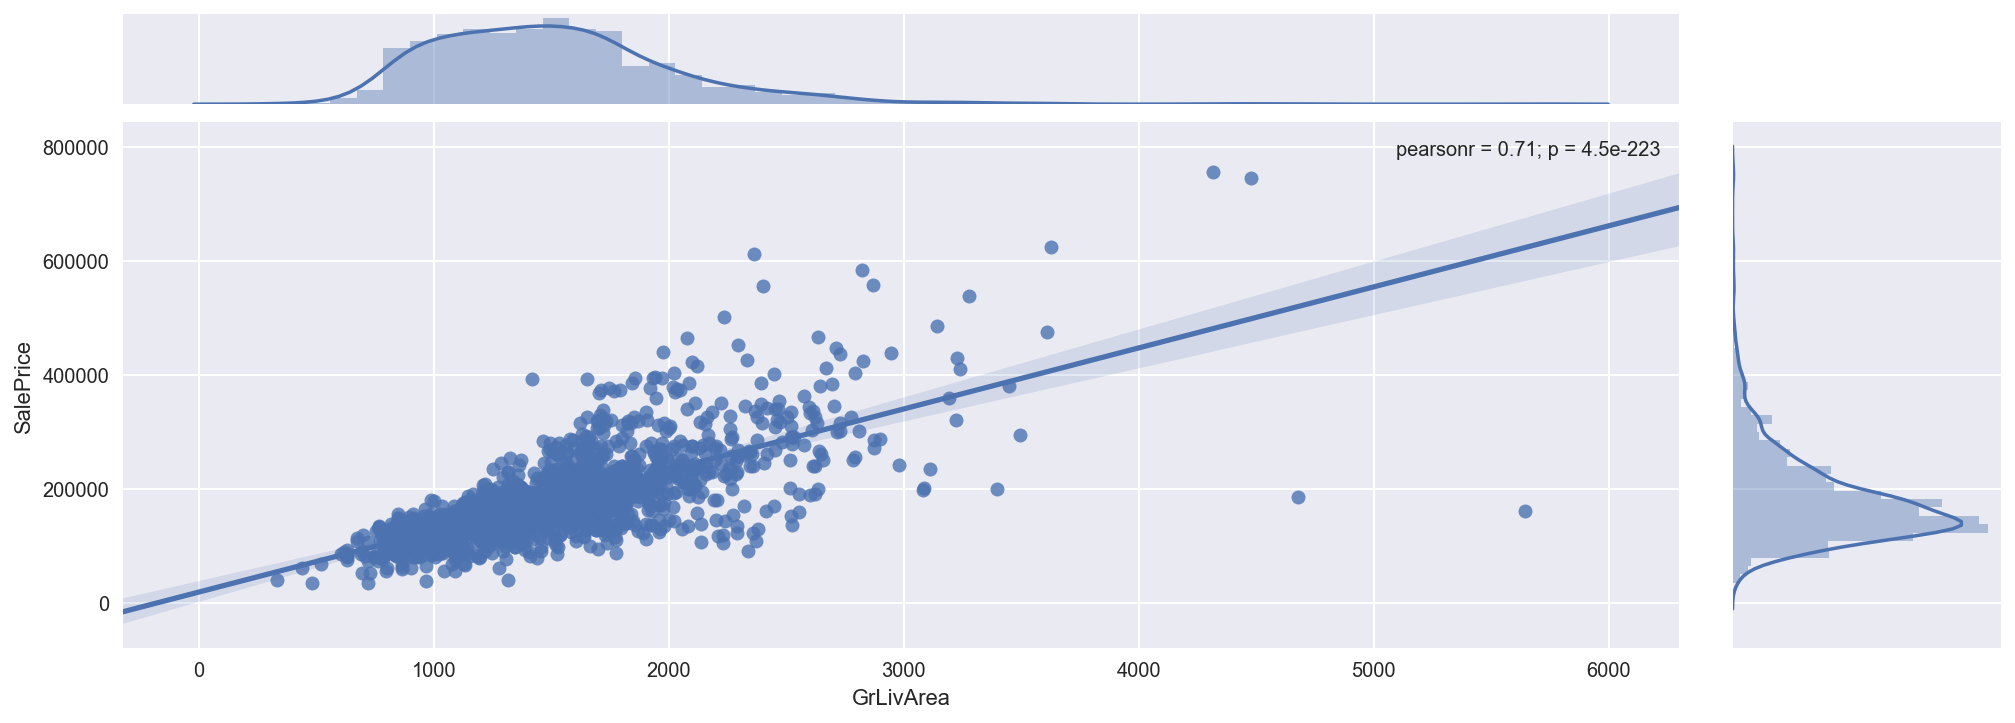

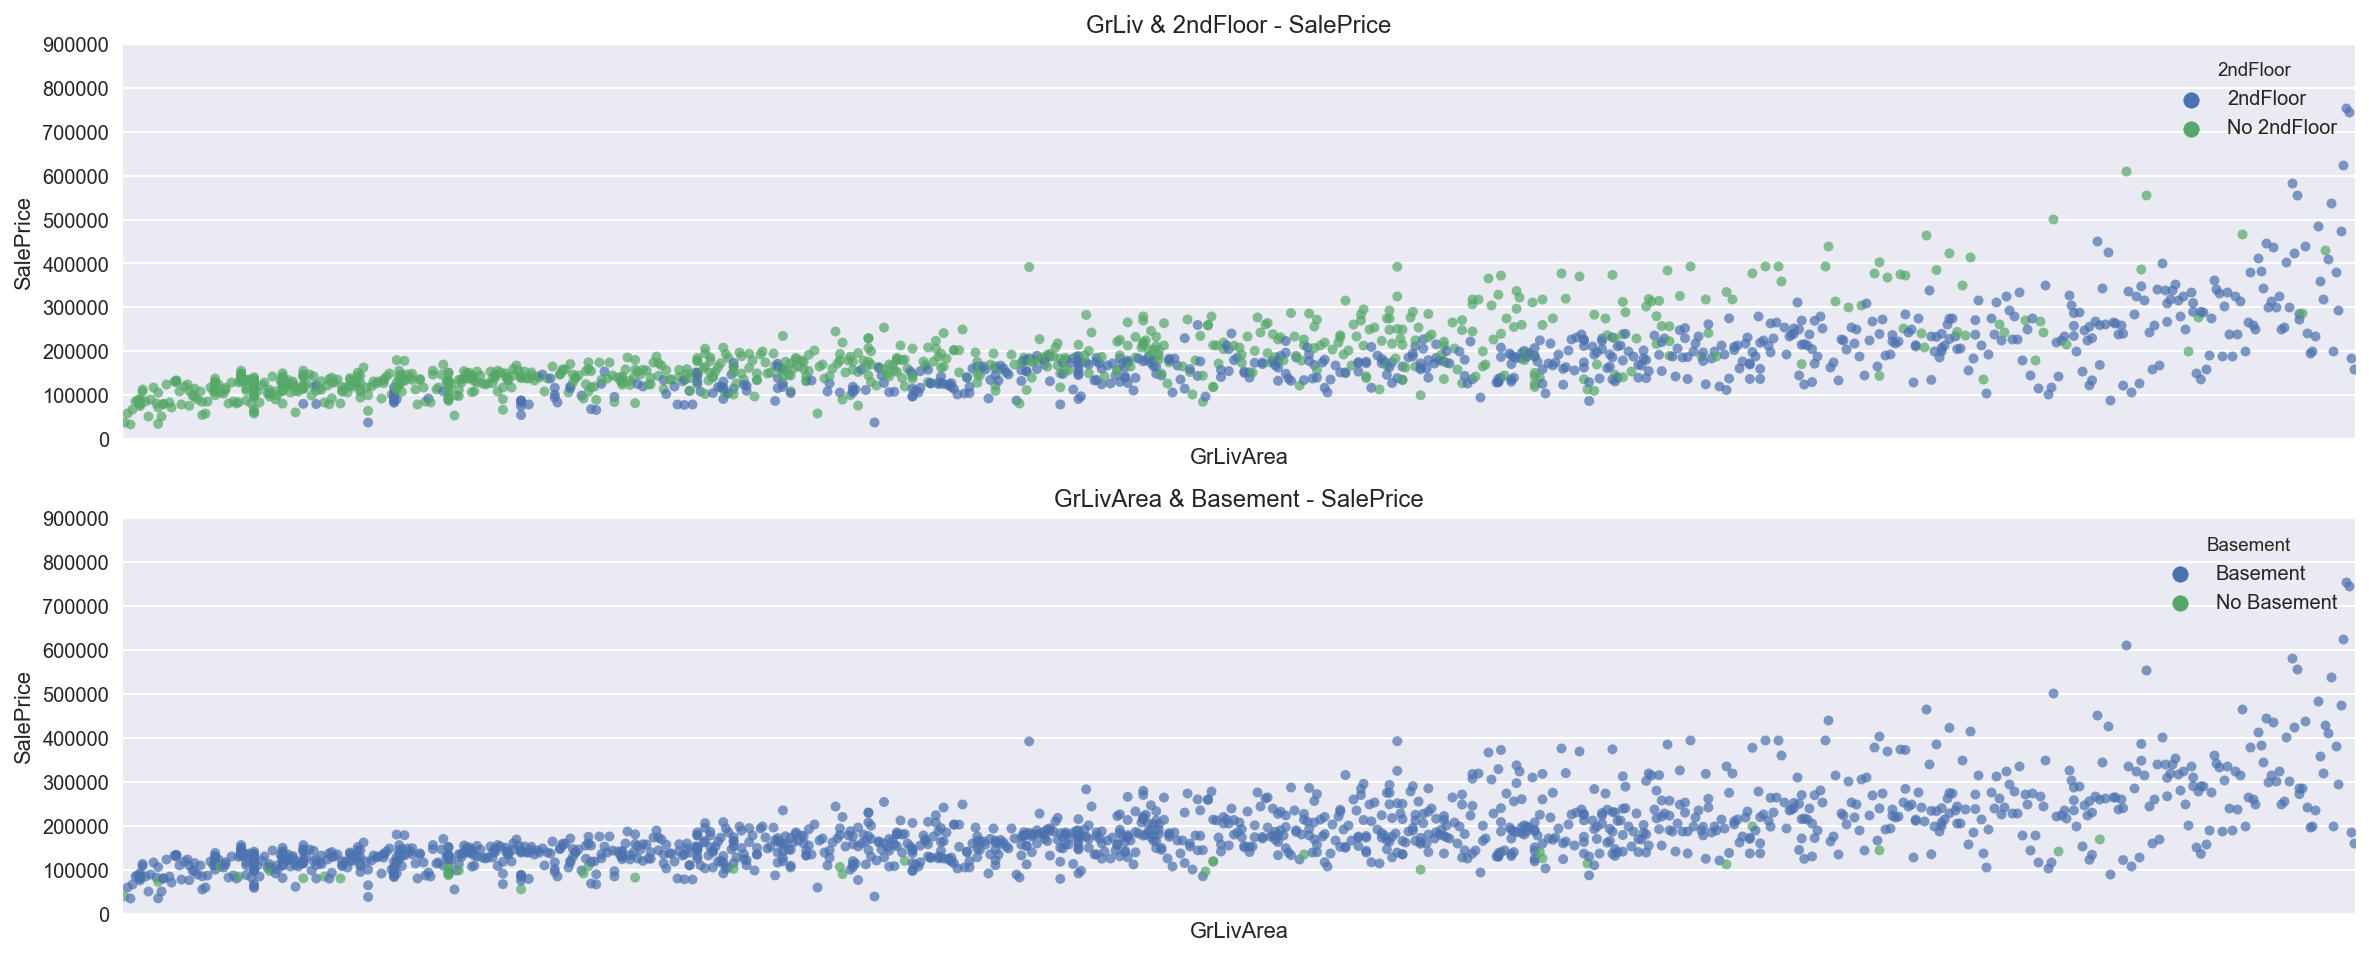

In [16]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)

plt.figure(figsize = (20,8))
plt.subplot(211)
g = sns.stripplot(x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.7)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,900000)
g.set_xticks([])
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(212)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.7)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
b.set_ylim(0,900000)
b.set_title('GrLivArea & Basement - SalePrice')
b.set_xticks([])

plt.show()

In [17]:
outlier_GrLivArea = train[(train["GrLivArea"] >4000)]
outlier_GrLivArea

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524         60       RL        130.0    40094   Pave   NaN      IR1   
691    692         60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183         60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299         60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
523          Bnk    AllPub    ...            0    NaN    NaN         NaN   
691          Lvl    AllPub    ...            0    NaN    NaN         NaN   
1182         Lvl    AllPub    ...          555   10.0  MnPrv         NaN   
1298         Bnk    AllPub    ...          480    8.0    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
523        0     10   2007       New        Partial     184750  
691        0      1   2007        WD         Normal     755000  
1182       0      7   2007        WD        Abnorml     745000  
1298       0      1   2008       New        Partial     160000  

[4 rows x 81 columns]

In [18]:
train.drop(outlier_GrLivArea.index, axis=0,inplace=True)

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

#### 2-1-2 OverallQual & OverallCond

Text(0.5,1,'OverallCond - SalePrice')

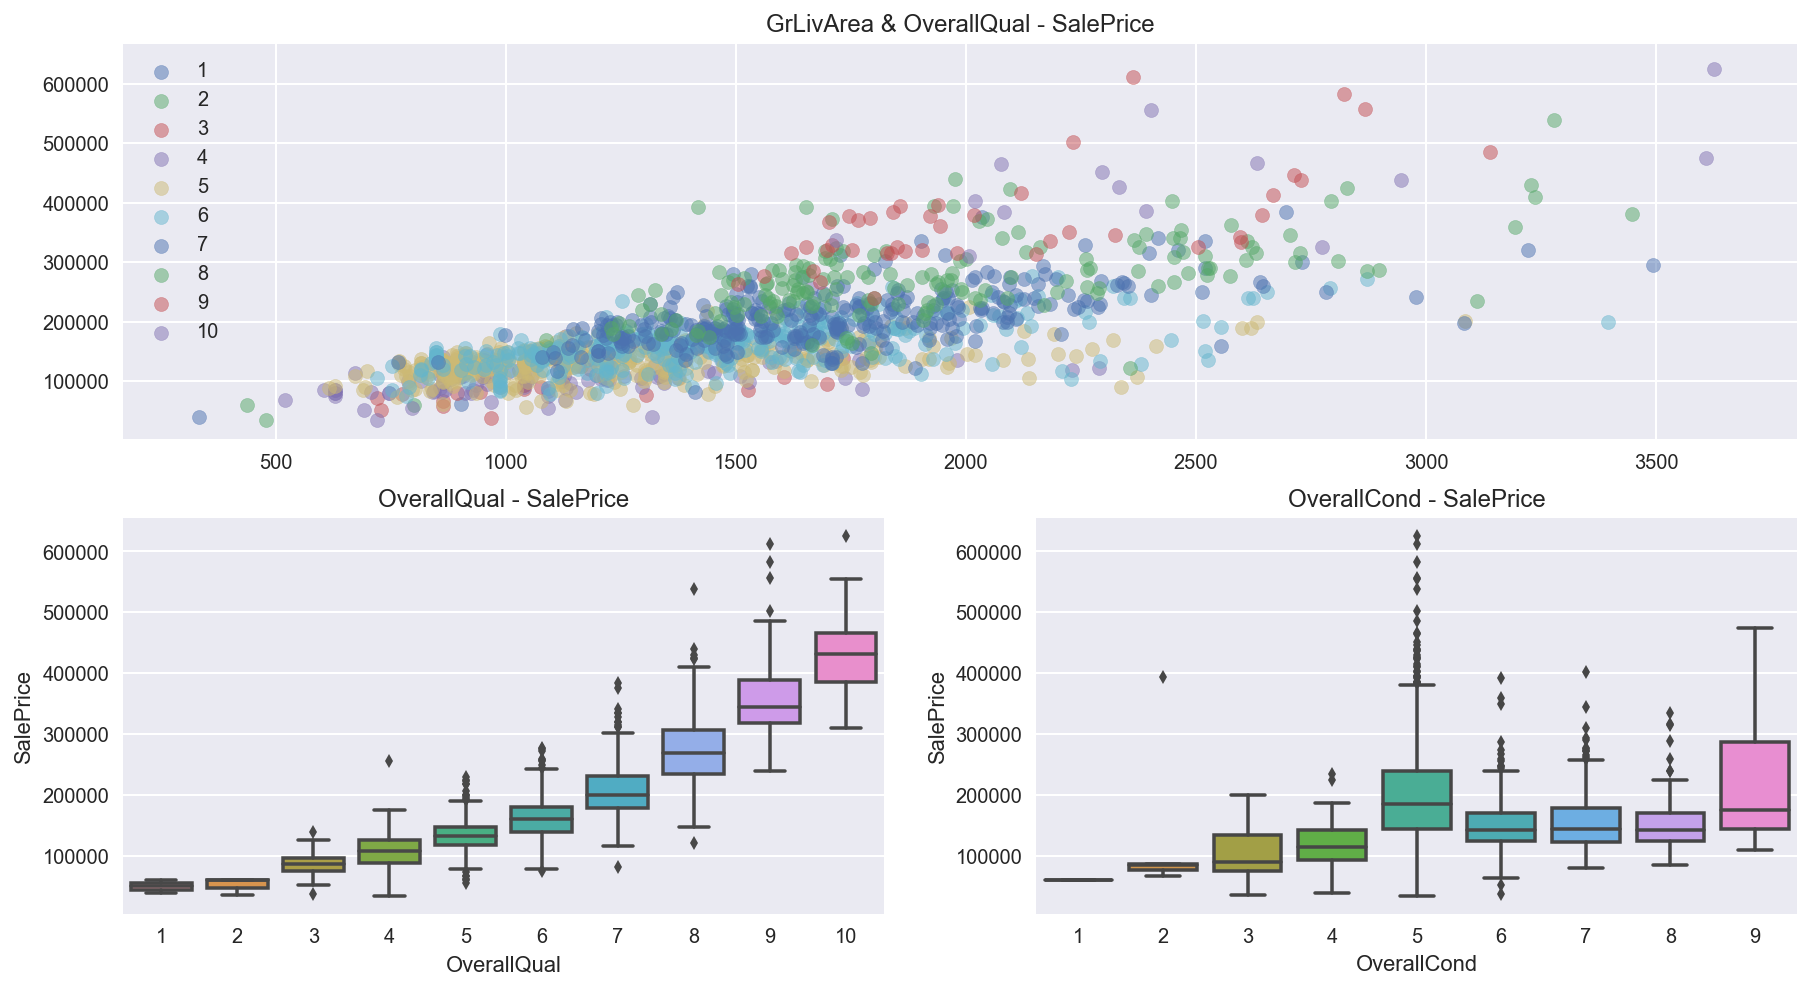

In [19]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

In [20]:
outlier_OverallQual = train[(train["SalePrice"] >600000) | ((train["SalePrice"] > 500000) & (train["OverallQual"]==9)) | \
      ((train["SalePrice"] > 500000) & ((train["OverallQual"]==9) |(train["OverallQual"]==8)))]
outlier_OverallQual

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
178    179         20       RL         63.0    17423   Pave   NaN      IR1   
769    770         60       RL         47.0    53504   Pave   NaN      IR2   
803    804         60       RL        107.0    13891   Pave   NaN      Reg   
898    899         20       RL        100.0    12919   Pave   NaN      IR1   
1046  1047         60       RL         85.0    16056   Pave   NaN      IR1   
1169  1170         60       RL        118.0    35760   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
178          Lvl    AllPub    ...            0    NaN   NaN         NaN   
769          HLS    AllPub    ...            0    NaN   NaN         NaN   
803          Lvl    AllPub    ...            0    NaN   NaN         NaN   
898          Lvl    AllPub    ...            0    NaN   NaN         NaN   
1046         Lvl    AllPub    ...            0    NaN   NaN         NaN   
1169         Lvl    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
178        0      7   2009       New        Partial     501837  
769        0      6   2010        WD         Normal     538000  
803        0      1   2009       New        Partial     582933  
898        0      3   2010       New        Partial     611657  
1046       0      7   2006       New        Partial     556581  
1169       0      7   2006        WD         Normal     625000  

[6 rows x 81 columns]

In [21]:
train.drop(outlier_OverallQual.index, axis=0, inplace=True)

Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

#### 2-1-2 GarageArea & GarageCars

In [22]:
outlier_GarageArea = train[(train["SalePrice"] >500000)]
outlier_GarageArea

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
440  441         20       RL        105.0    15431   Pave   NaN      Reg   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
440         Lvl    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
440       0      4   2009        WD         Normal     555000  

[1 rows x 81 columns]

In [23]:
train.drop(outlier_GarageArea.index, axis=0,inplace=True)

Find :

#### 2-1-3 Neighborhood

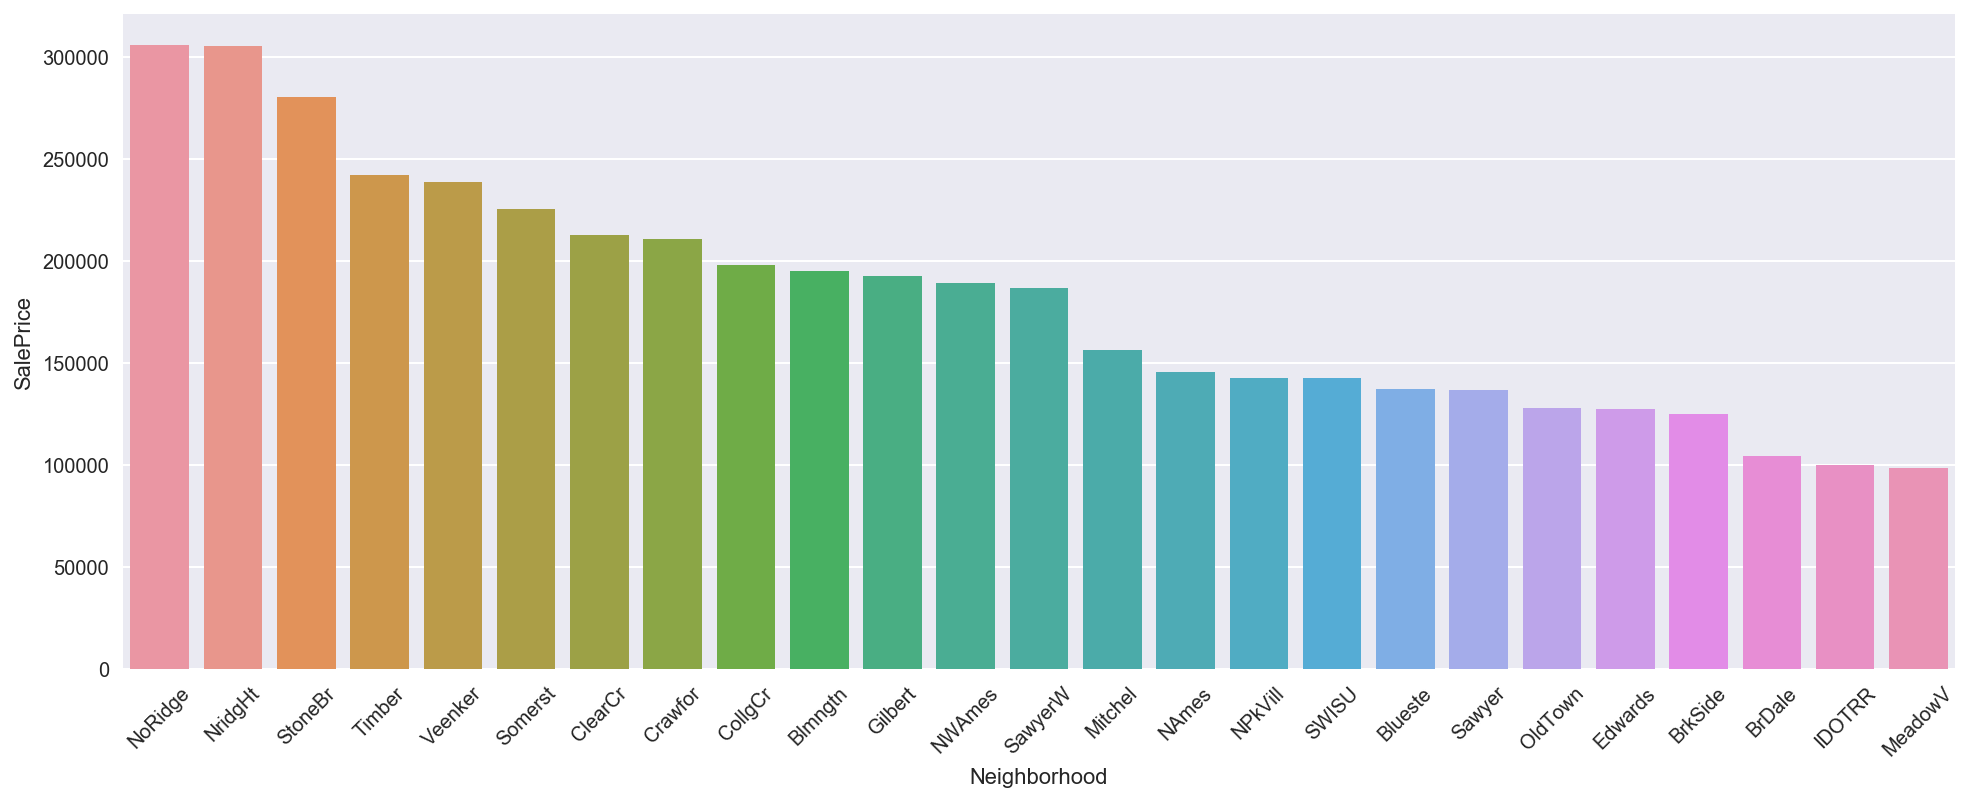

In [24]:
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()

g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [25]:
df_train = train.copy()

# High_price_neighbor : 판매가 250000 이상 
# Middle_price_neighbor : 판매가 150000 ~ 250000
# Low_price_neighbor : 판매가 150000 이하
def neighbor_level(x):
    High_price_neighbor = ['NoRidge','NridgHt','StoneBr'] 
    Middle_price_neighbor = ['Timber','Somerst','Veenker','ClearCr','Crawfor','NWAmes', 'Gilbert','Blmngtn', 'SWISU','Mitchel','CollgCr']
    Low_price_neighbor = ['IDOTRR','Blueste', 'Sawyer','NAmes', 'BrDale', 'OldTown','MeadowV', 'NPkVill','BrkSide','Edwards']
    
    if str(x) in High_price_neighbor:
        return "high"
    elif str(x) in Middle_price_neighbor:
        return "middle"
    elif str(x) in Low_price_neighbor:
        return "low"

In [26]:
df_train["neighbor_level"] = df_train["Neighborhood"].apply(neighbor_level)
# l = df_train.groupby("neighbor_level").agg('mean')
# l = l.reindex(["high",'middle',"low"])

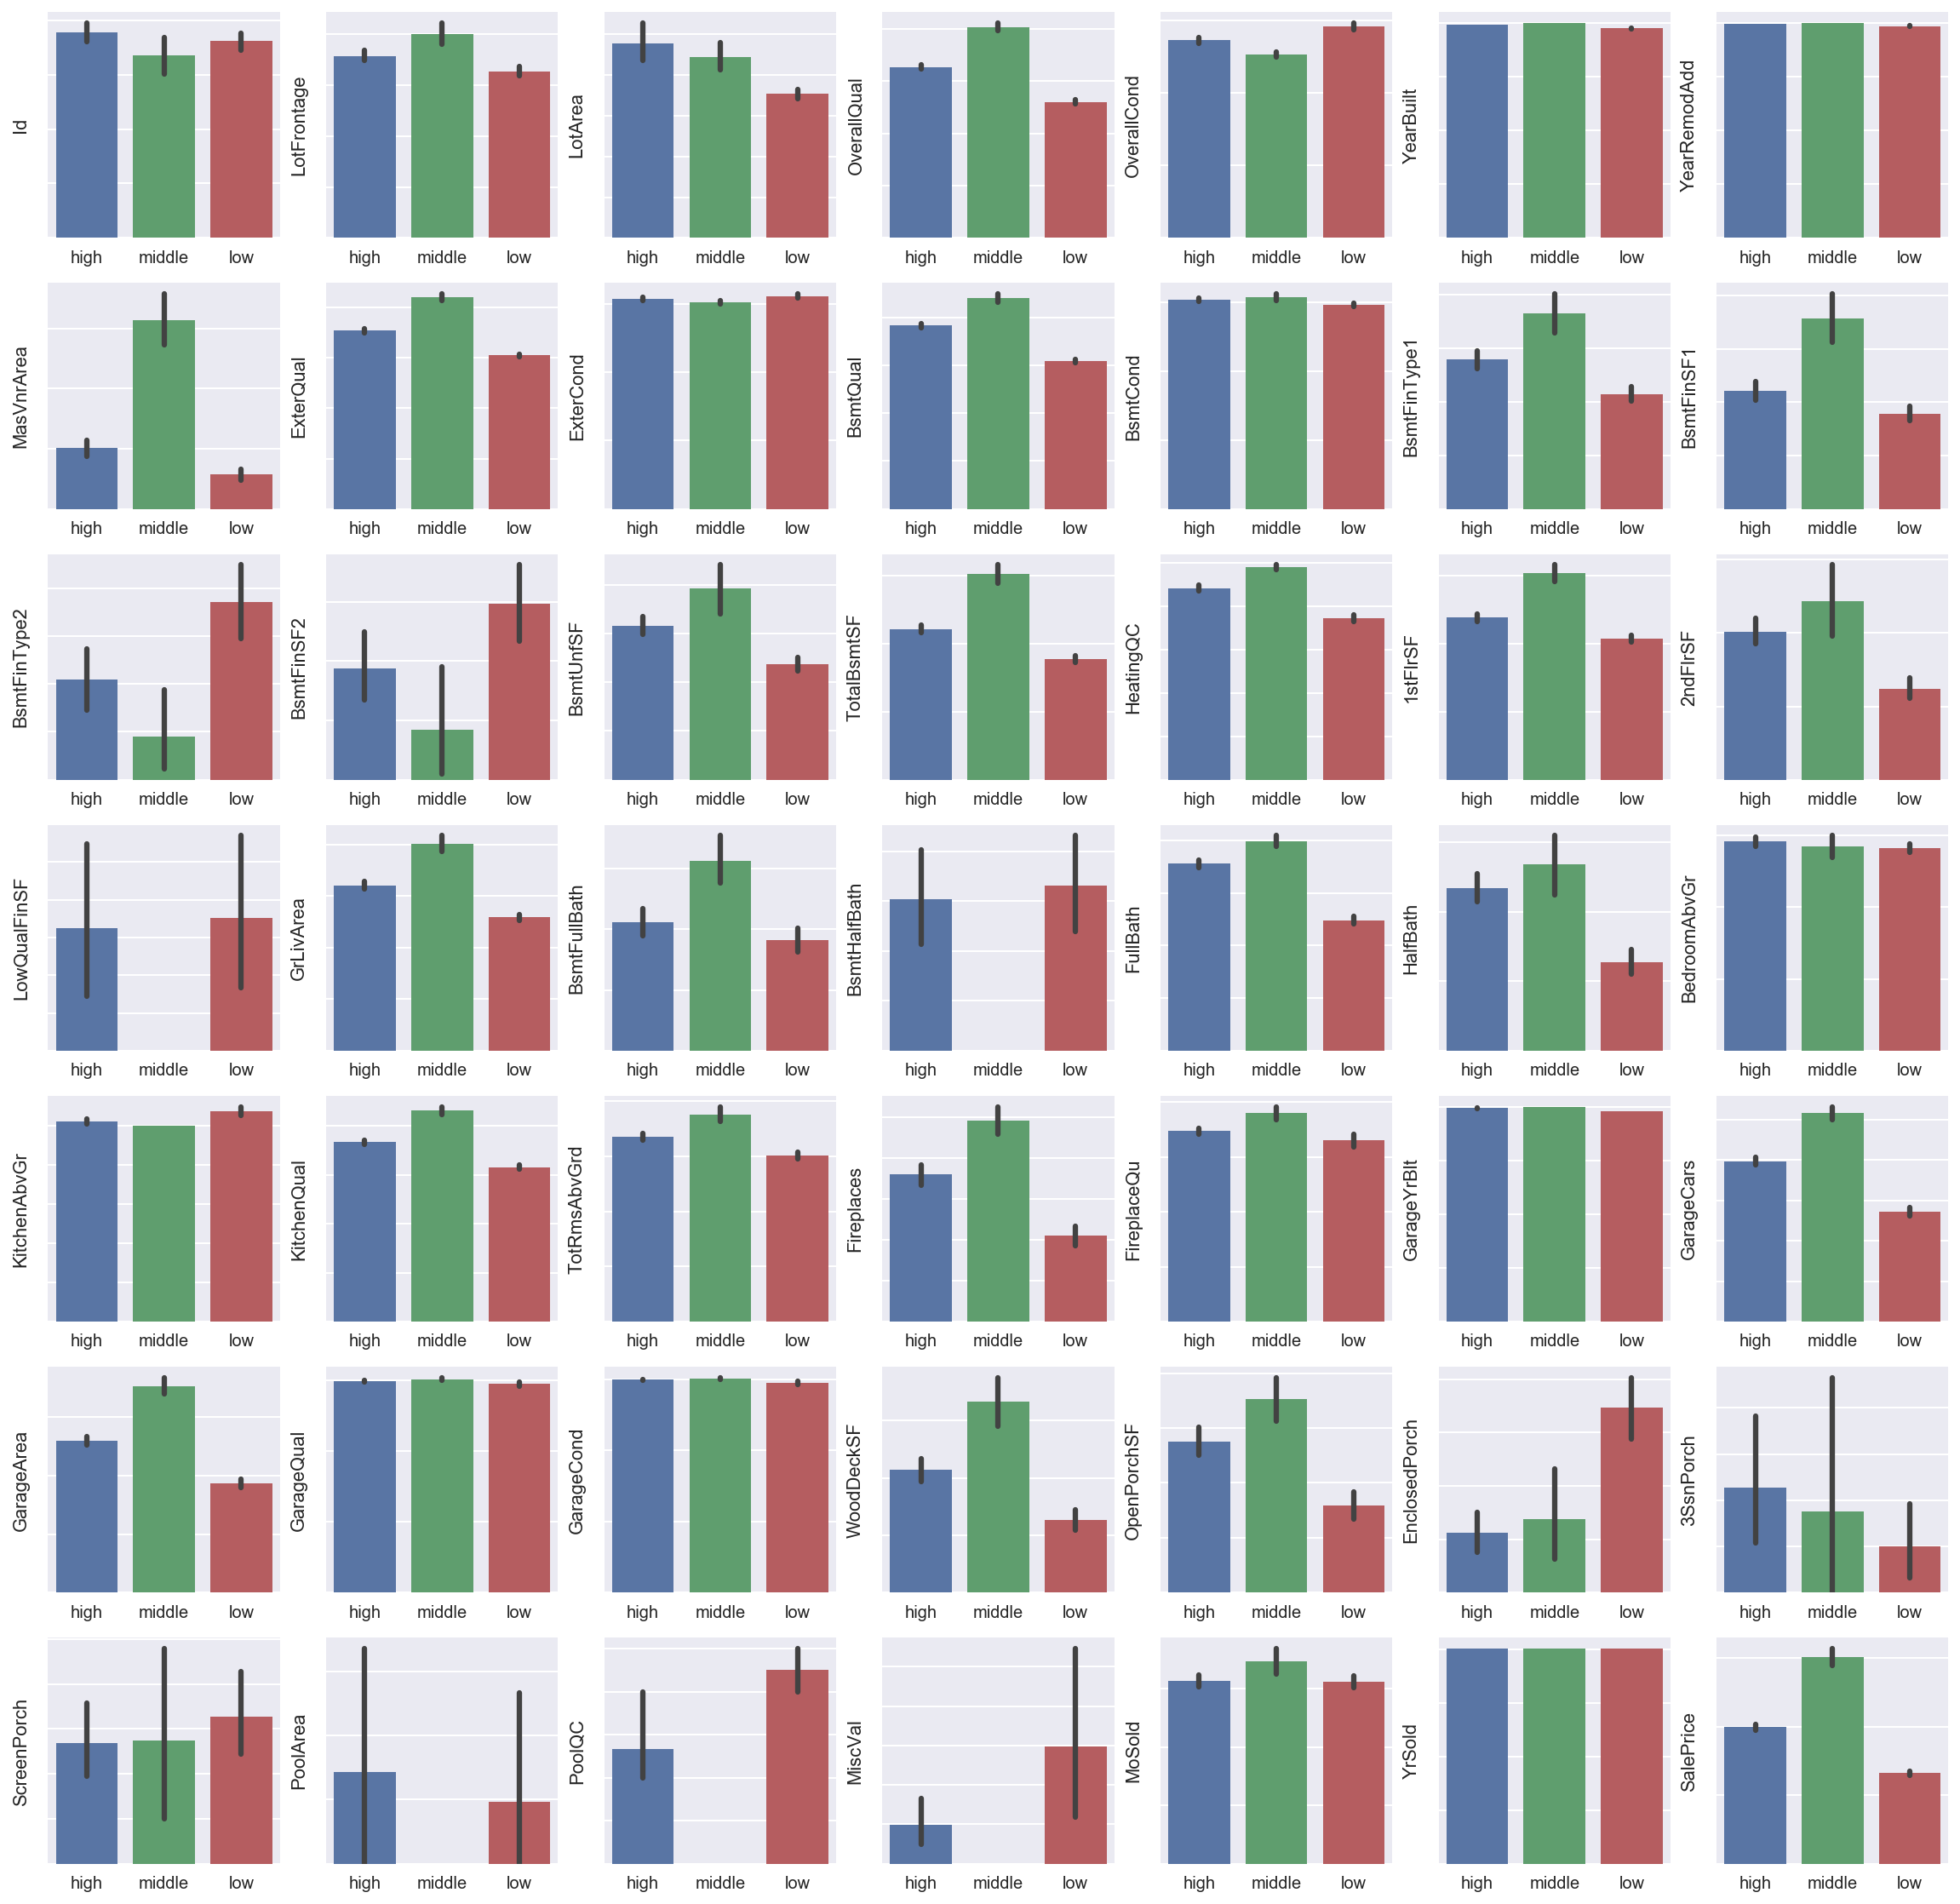

In [27]:
fig, ax = plt.subplots(7,7, figsize = (20,20))

for idx, n in enumerate(numerical_features):

    sns.barplot(x="neighbor_level", y= n, data=df_train, ax = ax[idx//7,idx%7])
    ax[idx//7, idx % 7].set(yticklabels=[])
    ax[idx//7, idx % 7].set(xticklabels=["high","middle","low"])
    ax[idx//7, idx % 7].set_xlabel("")
    ax[idx//7, idx % 7].set_ylabel(n)
    continue  

Find:


#### 2-1-4 YearBuilt

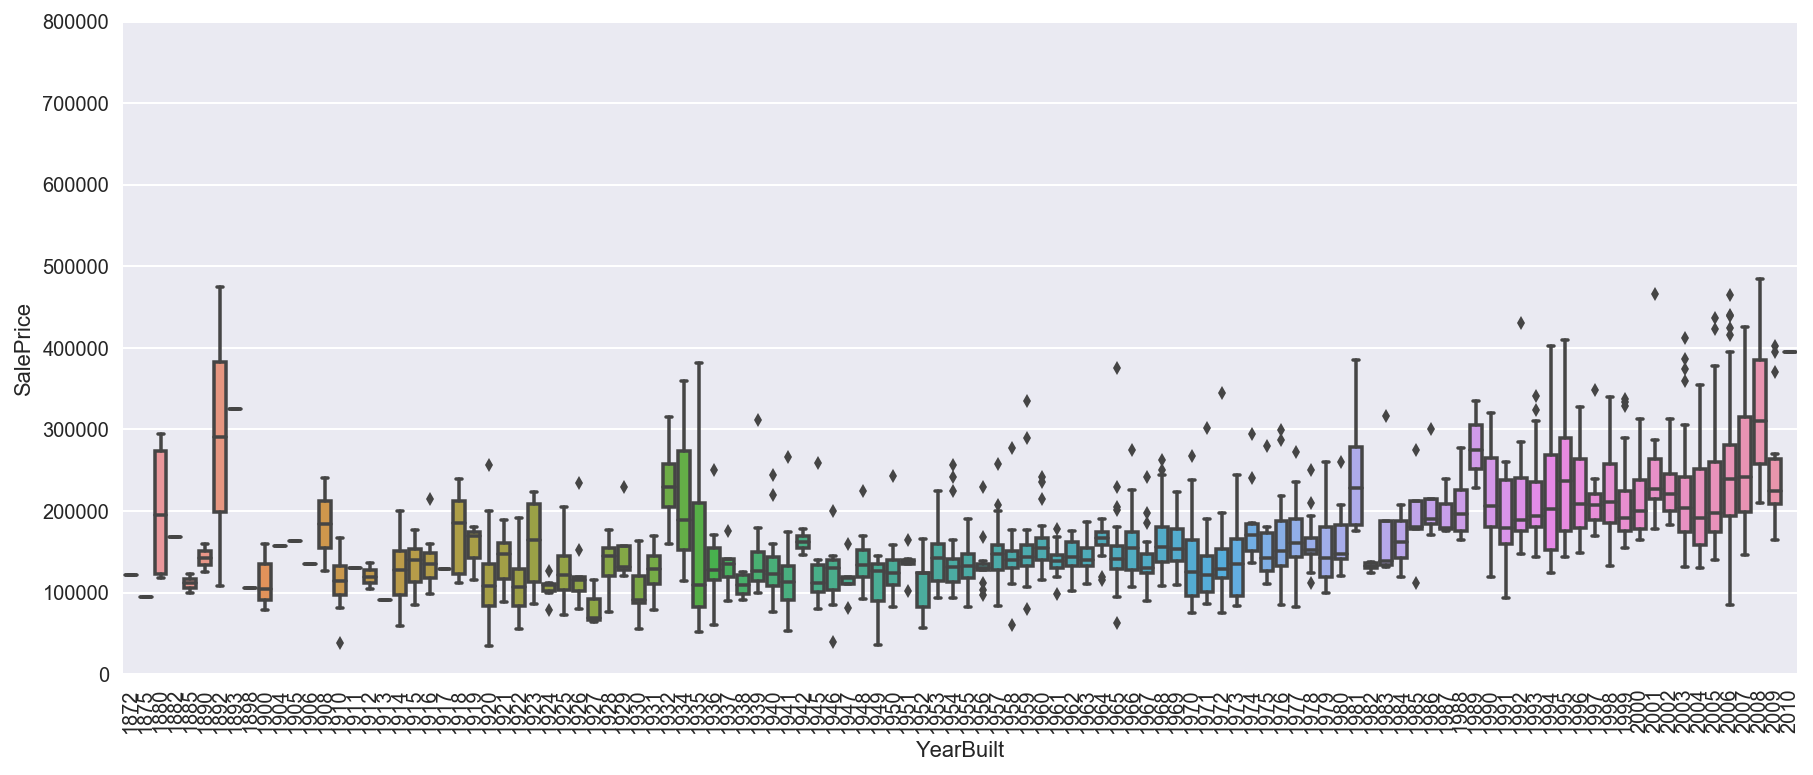

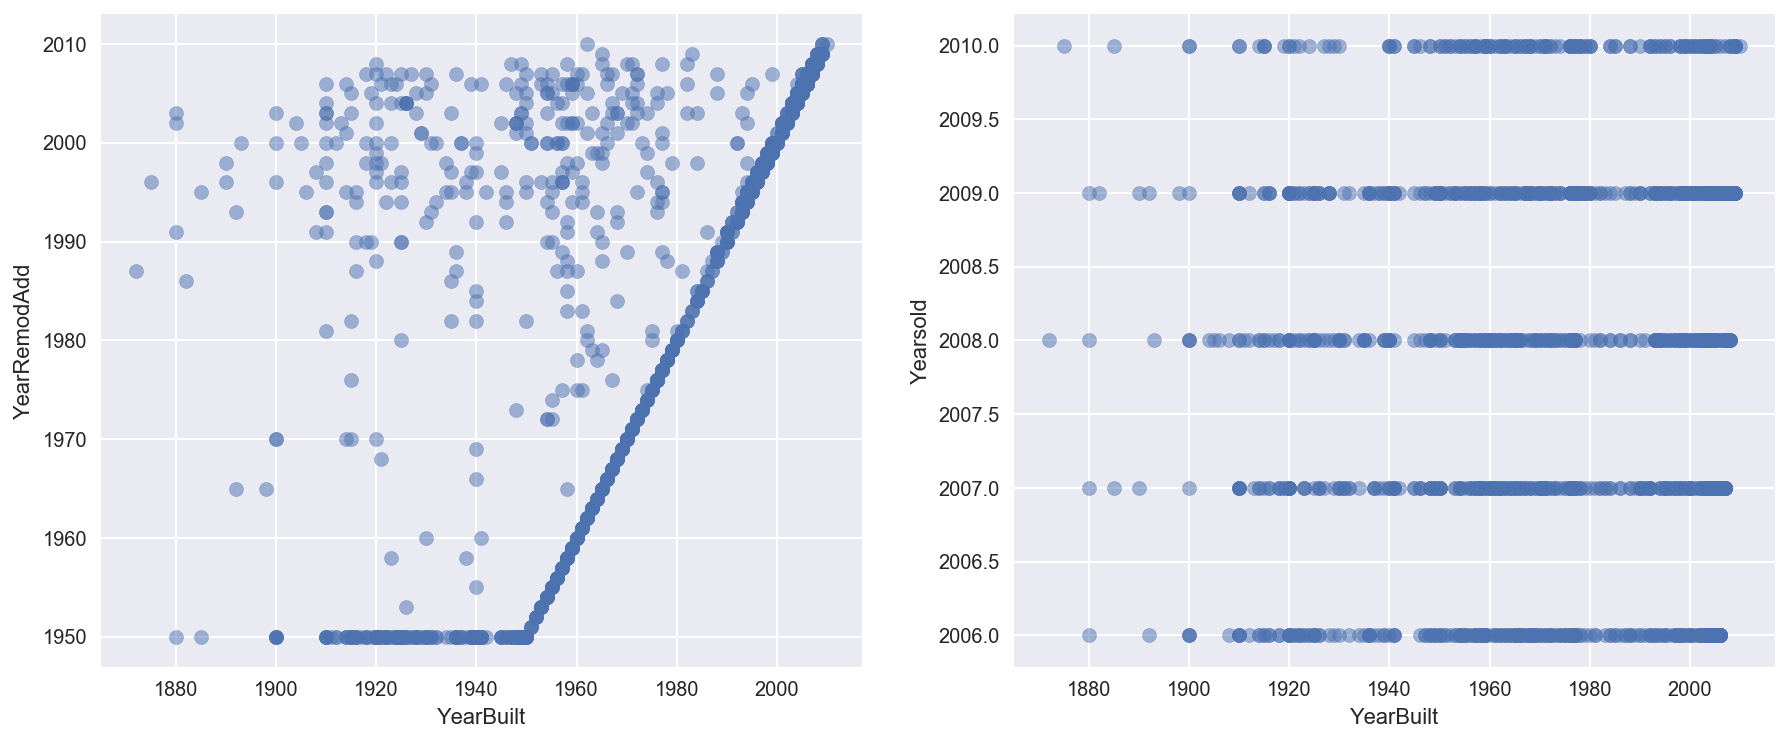

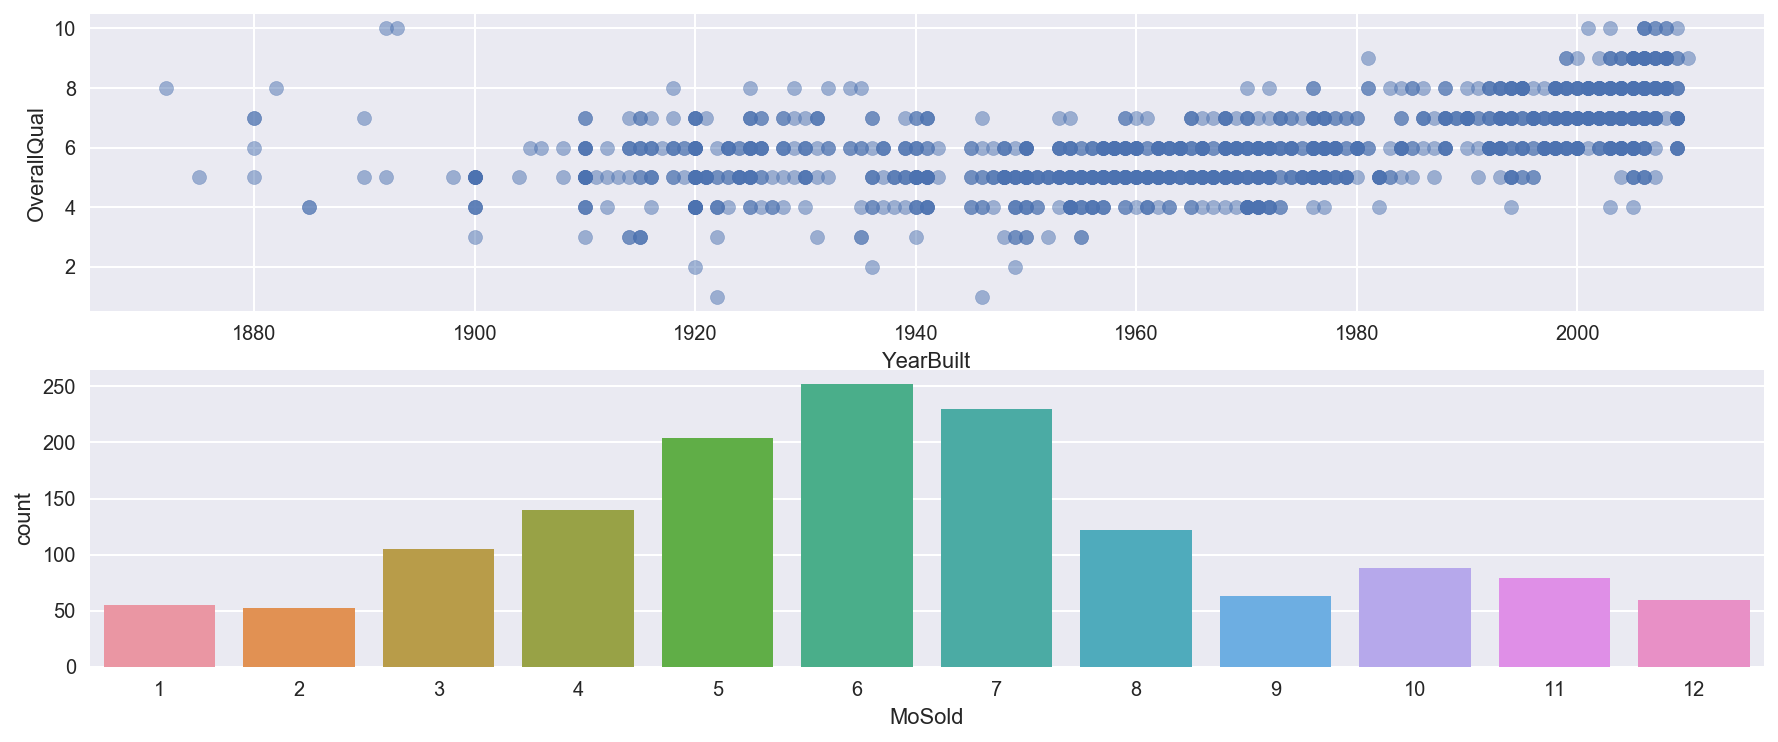

In [28]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('YearRemodAdd')
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('Yearsold')
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
plt.xlabel('YearBuilt')
plt.ylabel('OverallQual')
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1. 1950년대 이후로 지어진 집부터는 대체로 최근에 지어진 집의 가격이 높음을 알 수 있음.
2. 아직 리모델링이 되지 않은 집은 지어진 년도와 같은 년도로 기록되어 있음.
3. 리모델링은 1950년도 이후에 시행되었으며 오래된 집들은 대부분 1950년도에 리모델링 되었다고 기록되어 있음.
4. 매매년도는 2006년부터 2010년까지의 기록으로 되어있으며, 매매가 가장 많았던 년도는 2009년임.
5. OverallQual이 8-10인 집은 대체로 1980년도 이후에 지어진 집임.
6. 날이 따뜻한 5, 6, 7월에 가장 매매가 활발하게 이루어짐.

#### 2-1-5 Fireplaces & FireplaceQu

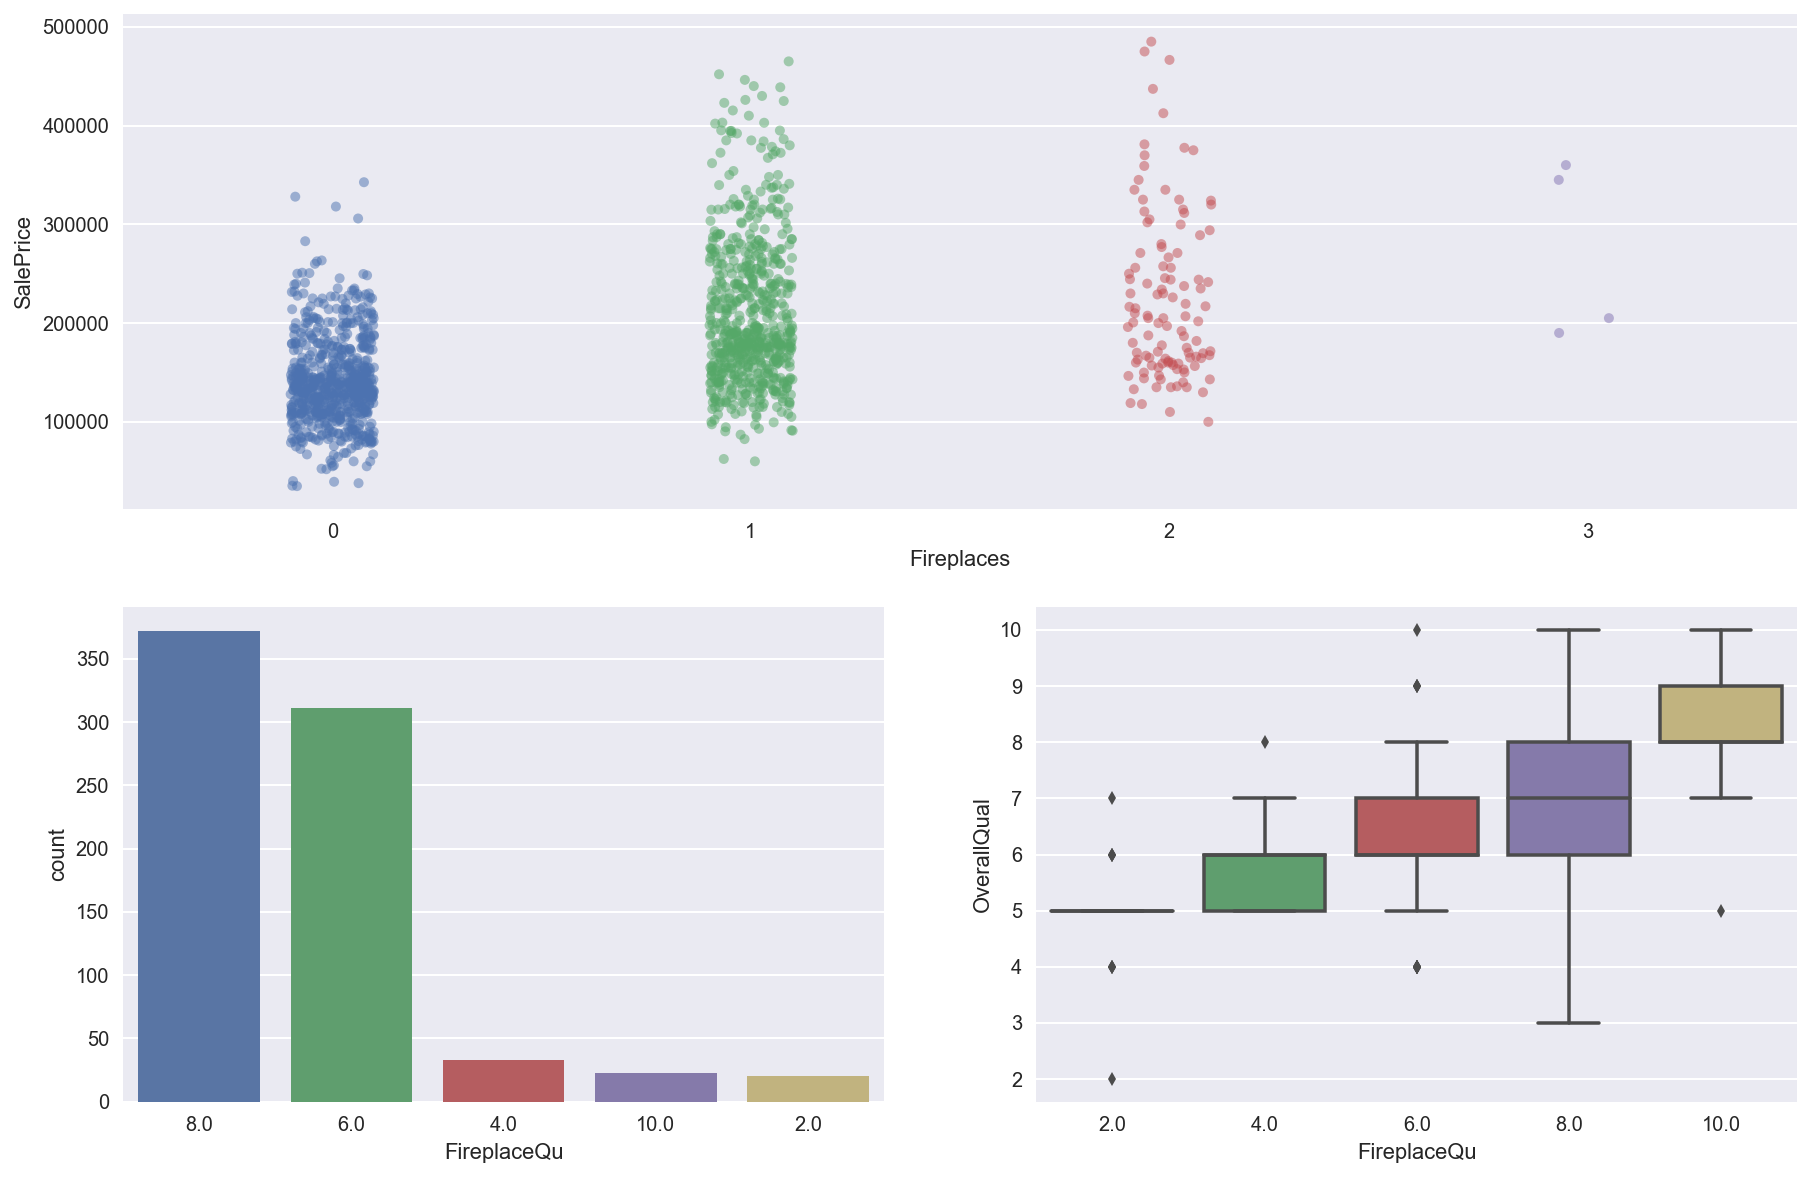

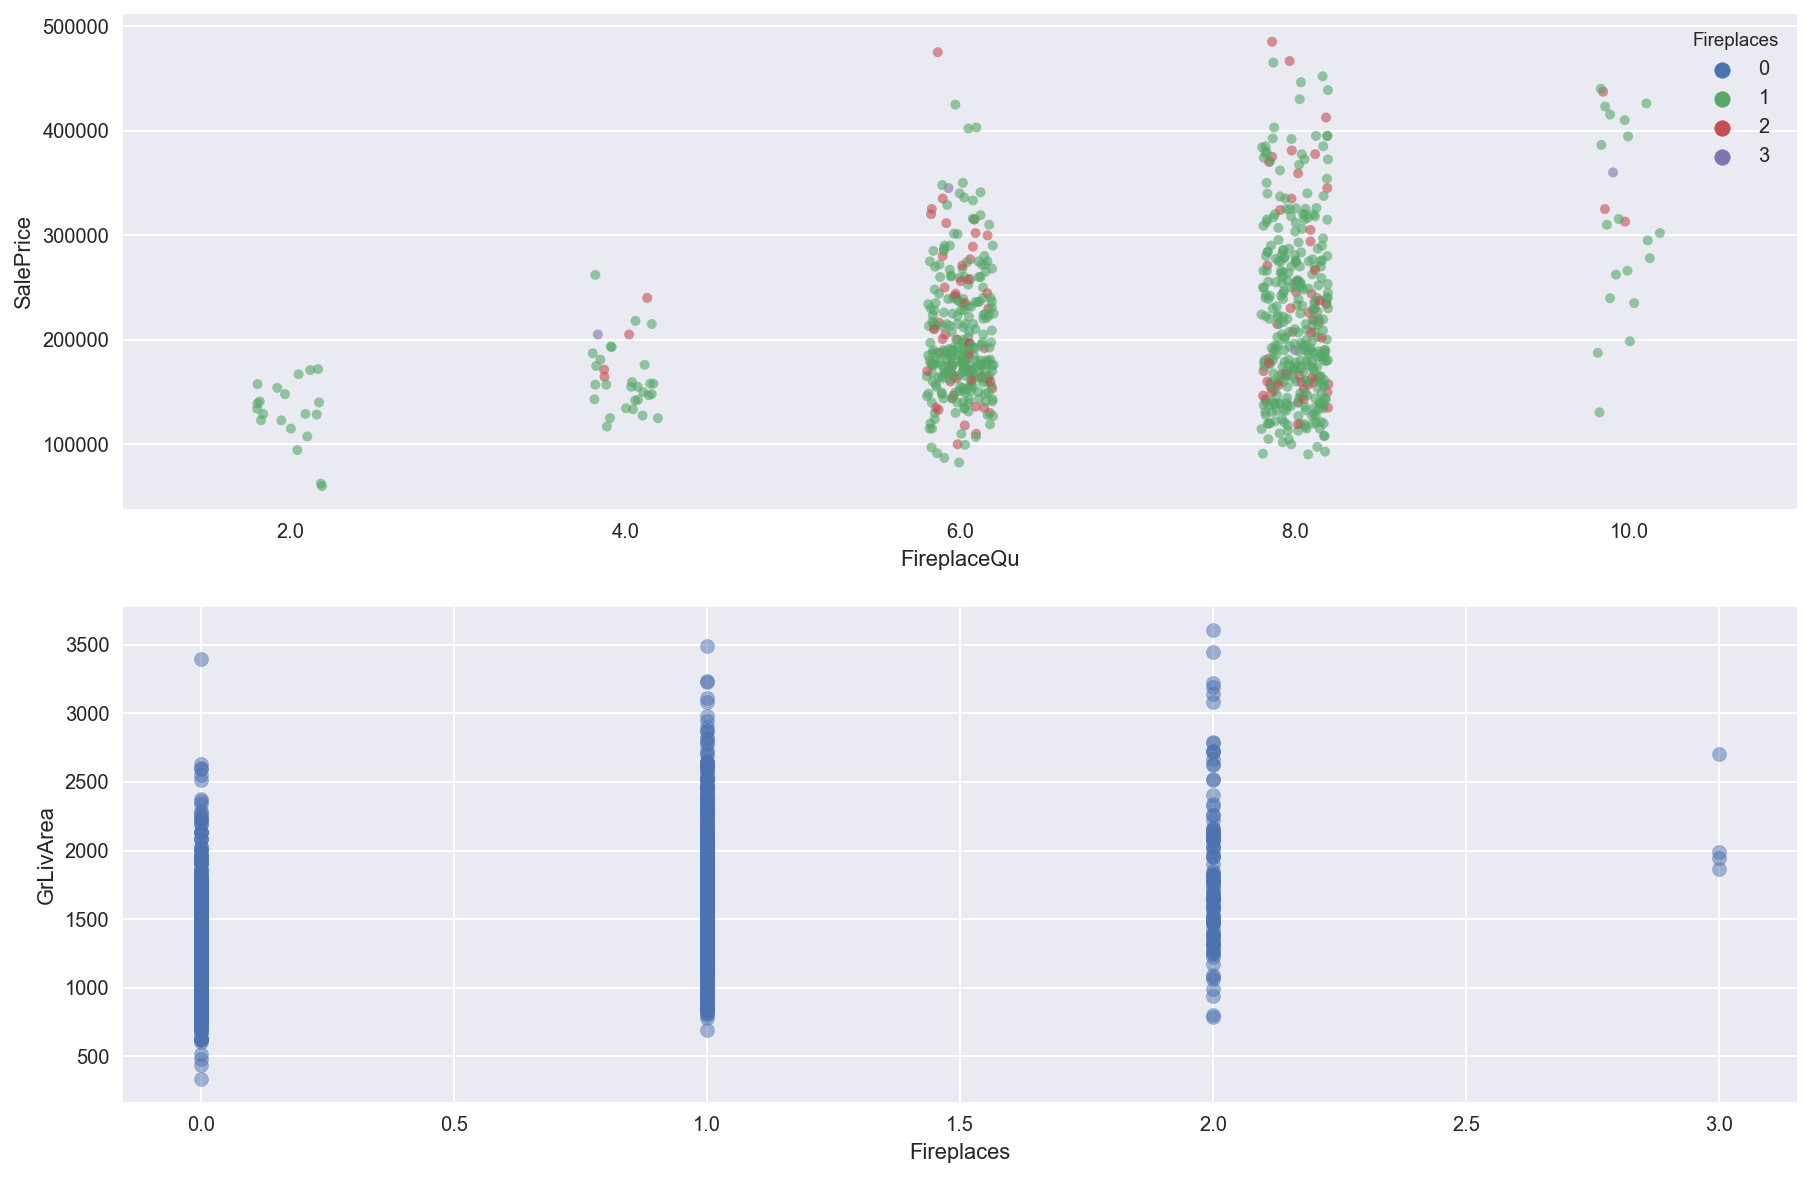

In [29]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.xlabel('Fireplaces')
plt.ylabel('GrLivArea')
plt.show()


Find

1. FirePlaces가 0개인 집과 1개인 집의 가격 차이가 있음을 볼 수 있음.
2. FireplaceQu와 OverallQual은 밀접한 관계가 있음.
3. FireplaceQu는 SalePrice에 많은 영향을 미친다고 볼 수는 없음.
4. 같은 GrLivArea임에도 Fireplaces의 갯수는 차이가 있음.

#### 2-1-6 BsmtBath

BsmtFullBath : 지하실 가득한 욕실  
BsmtHalfBath : 지하 욕실 반 화장실

BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',

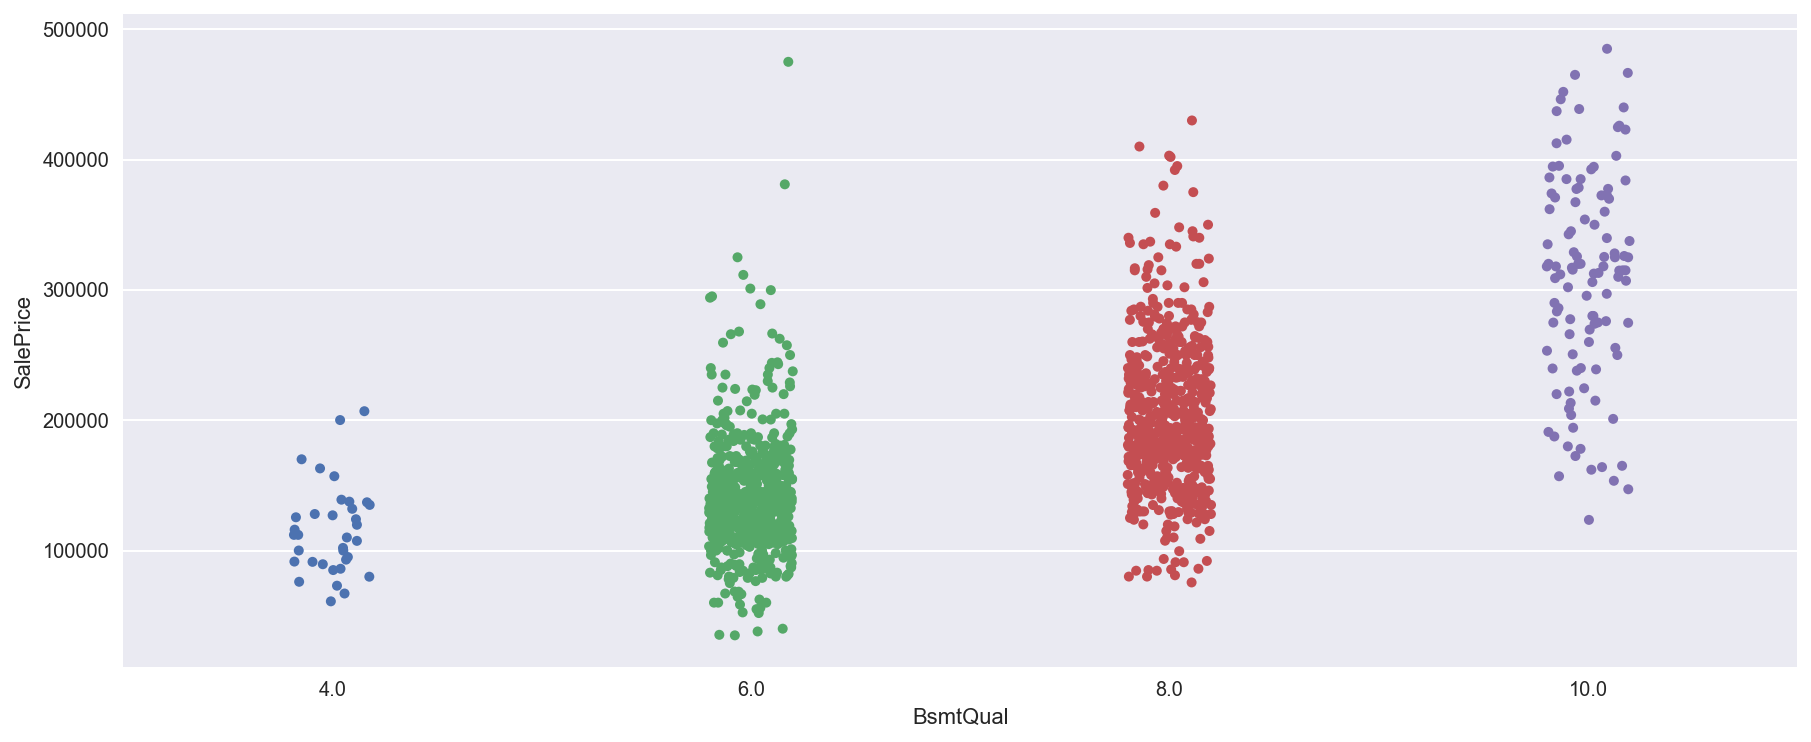

In [30]:
plt.figure(figsize=(15,6))
sns.stripplot(x = "BsmtQual", y = "SalePrice", data=train, jitter=True)
plt.show()

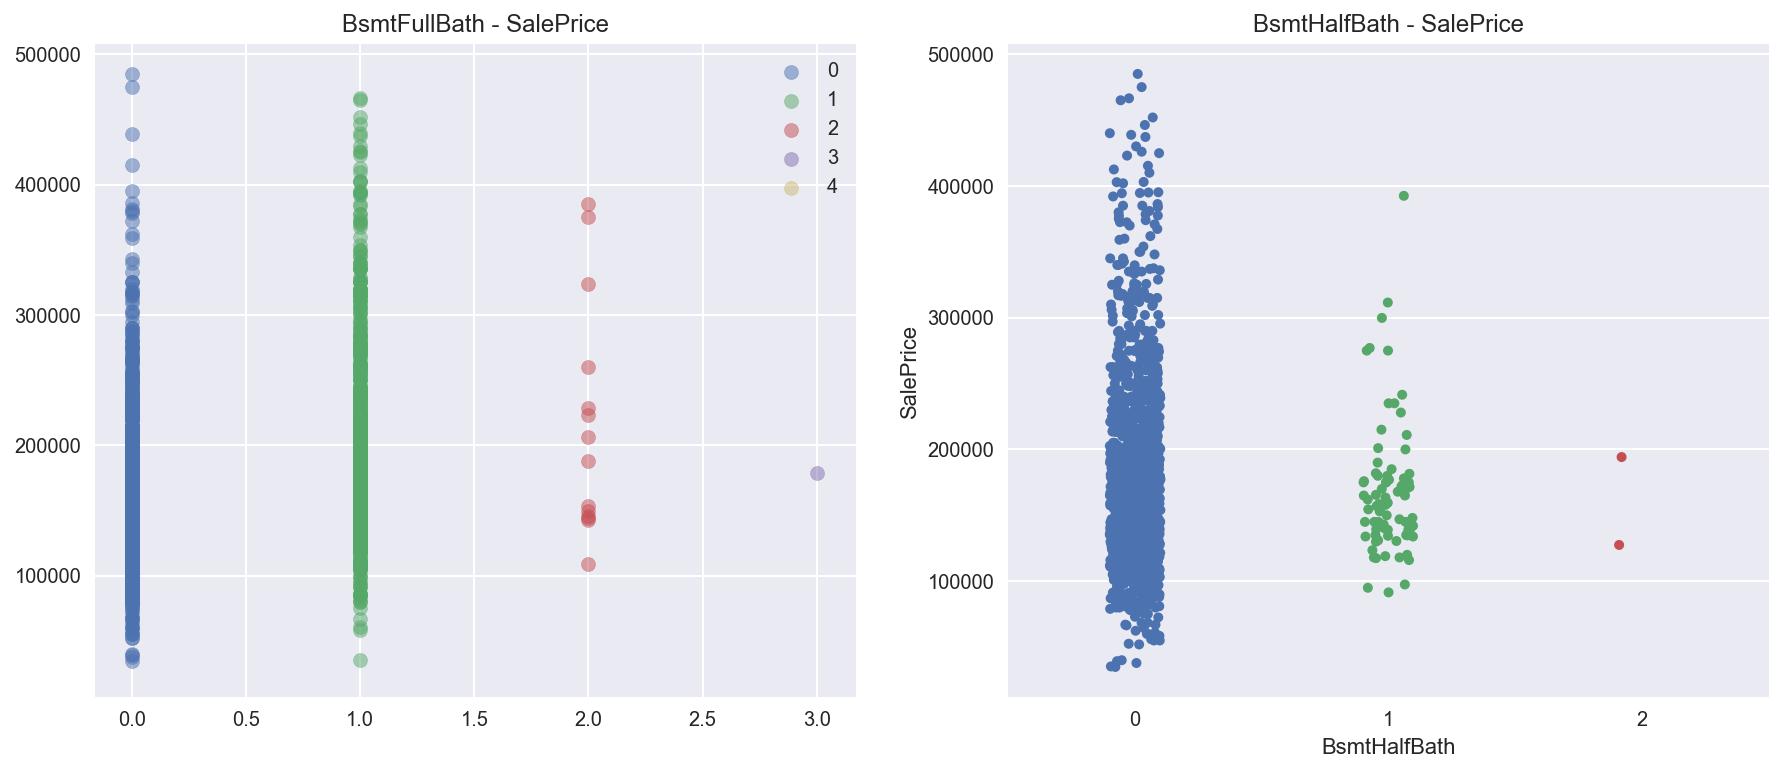

In [31]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for BSMT in range(0,5):
    index = train.BsmtFullBath == BSMT
    ax1.scatter(x = train.BsmtFullBath.loc[index], y = train.SalePrice.loc[index], data=train, label=BSMT, alpha='0.5')

ax1.legend()
ax1.set_title('BsmtFullBath - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BsmtHalfBath", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BsmtHalfBath - SalePrice')
ax2.legend()

Find:

BsmtFUllBATH의 경우에는 최소값에 영향을 주고 & HalfBath 의 경우에는 salprice에 큰 영향을 주지 않는 것으로 보인다.

#### 2-1-7 TotRm and Bedroom

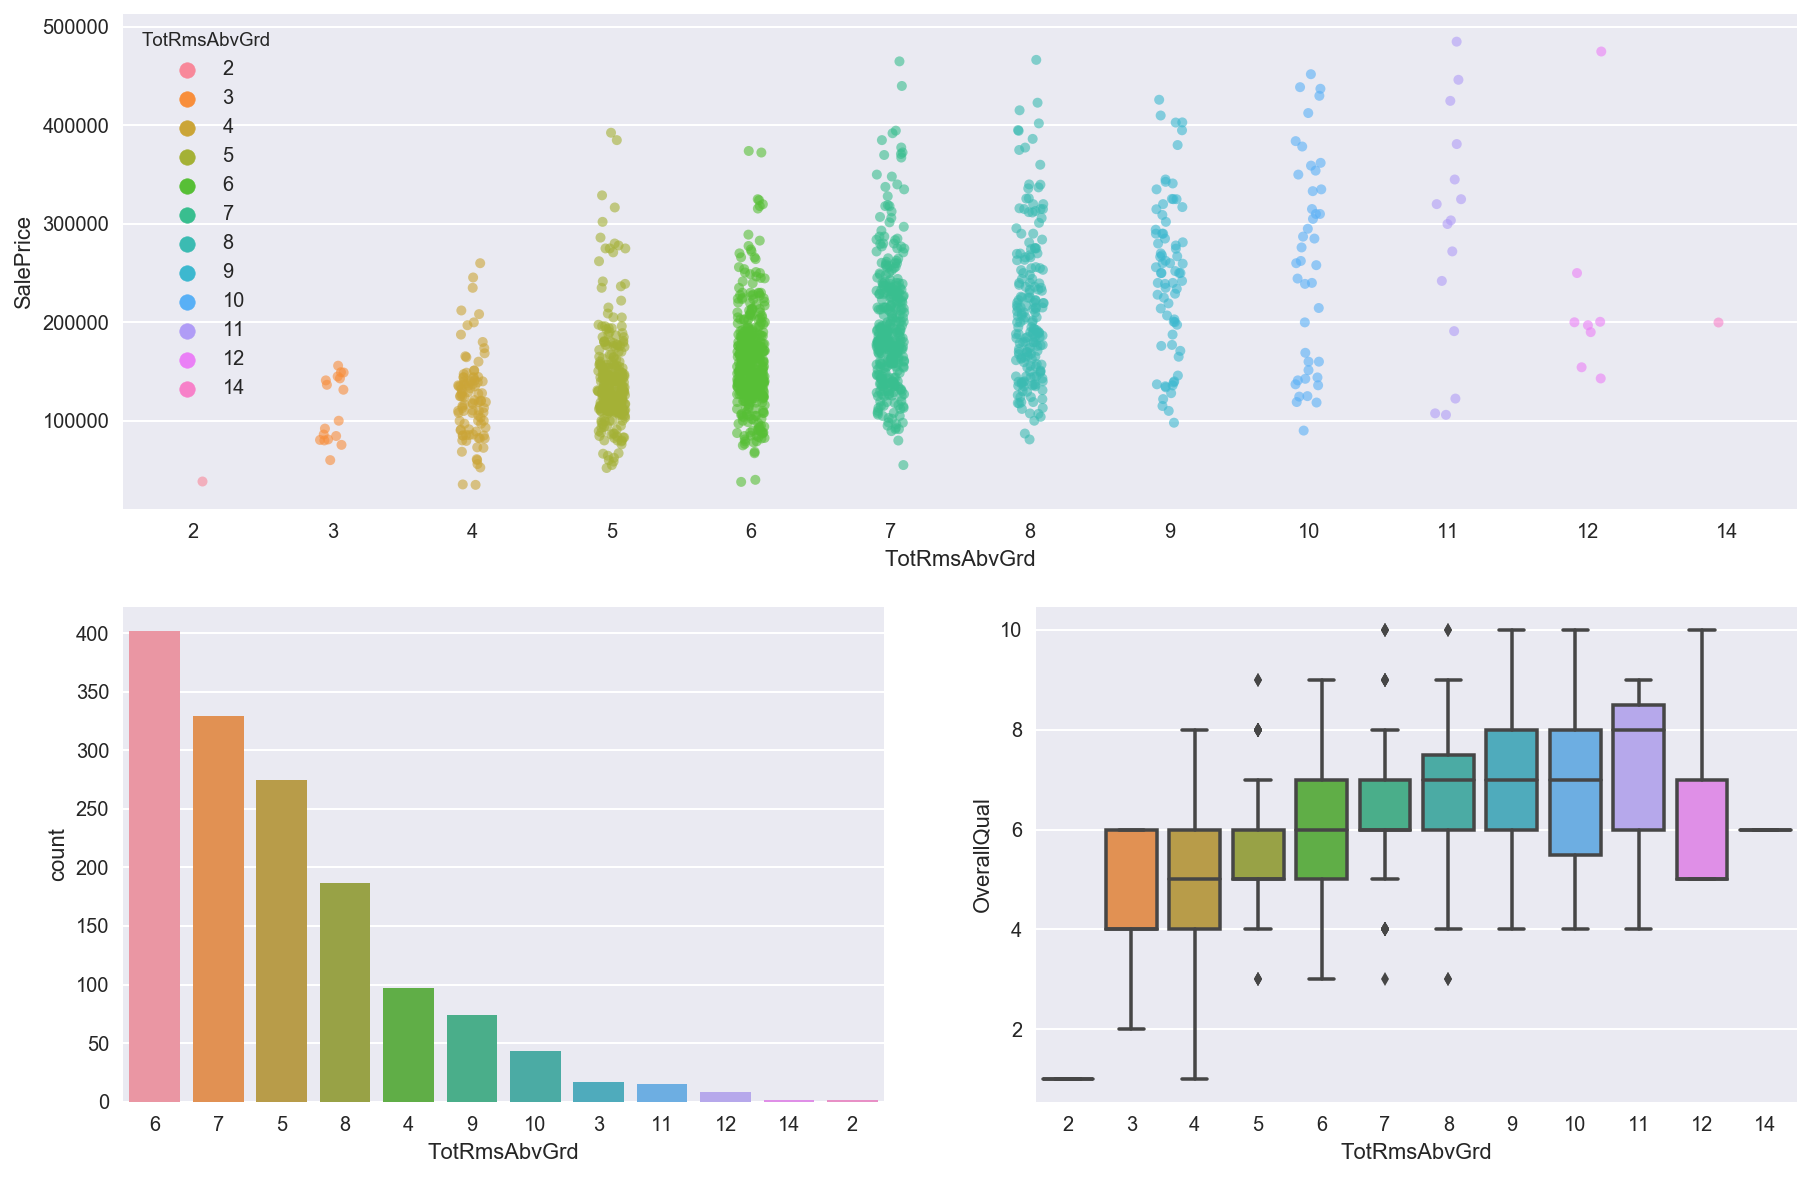

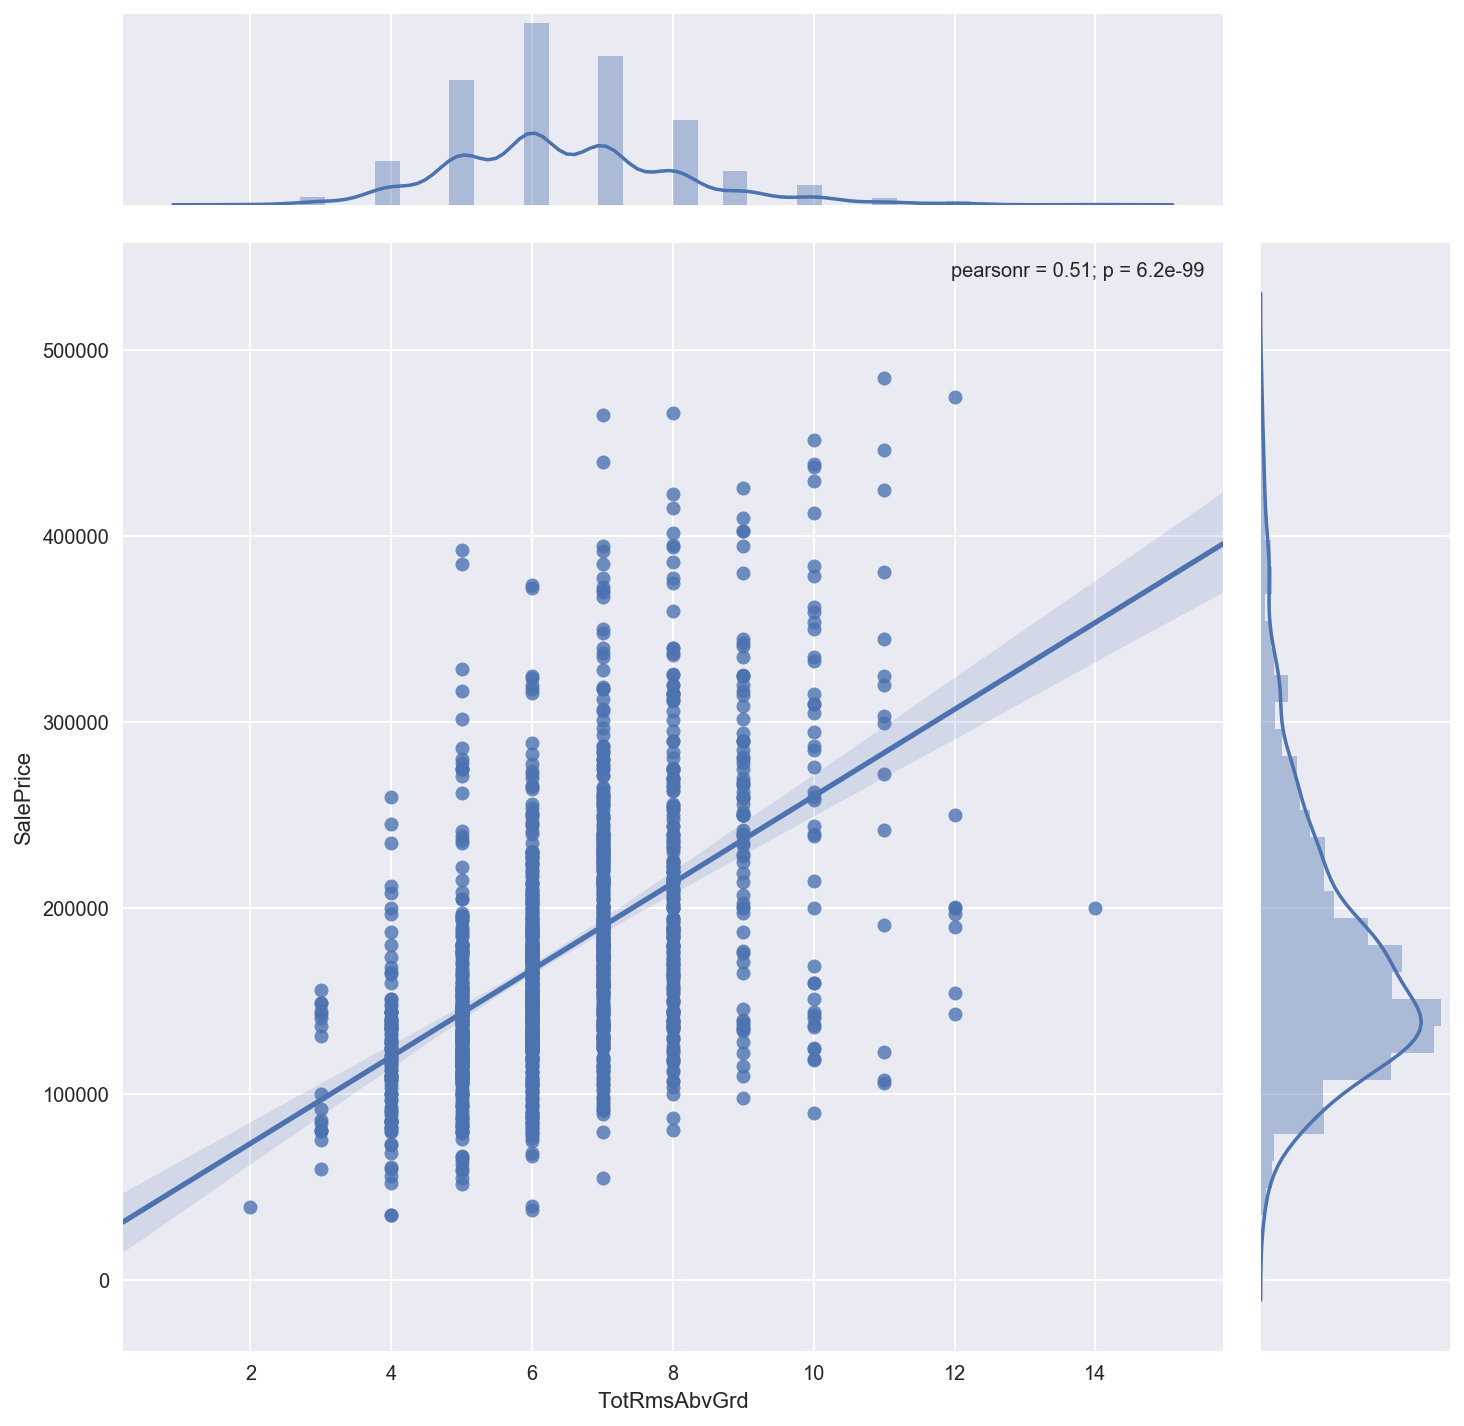

In [32]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,1,1)
sns.stripplot(x='TotRmsAbvGrd', y='SalePrice', hue='TotRmsAbvGrd', data=train, jitter=True, alpha=0.6, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "TotRmsAbvGrd", data=train , ax = ax2, order = train["TotRmsAbvGrd"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'OverallQual', data = train, ax=ax3)
plt.show()

grid = sns.jointplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train, kind="reg", size = 10)


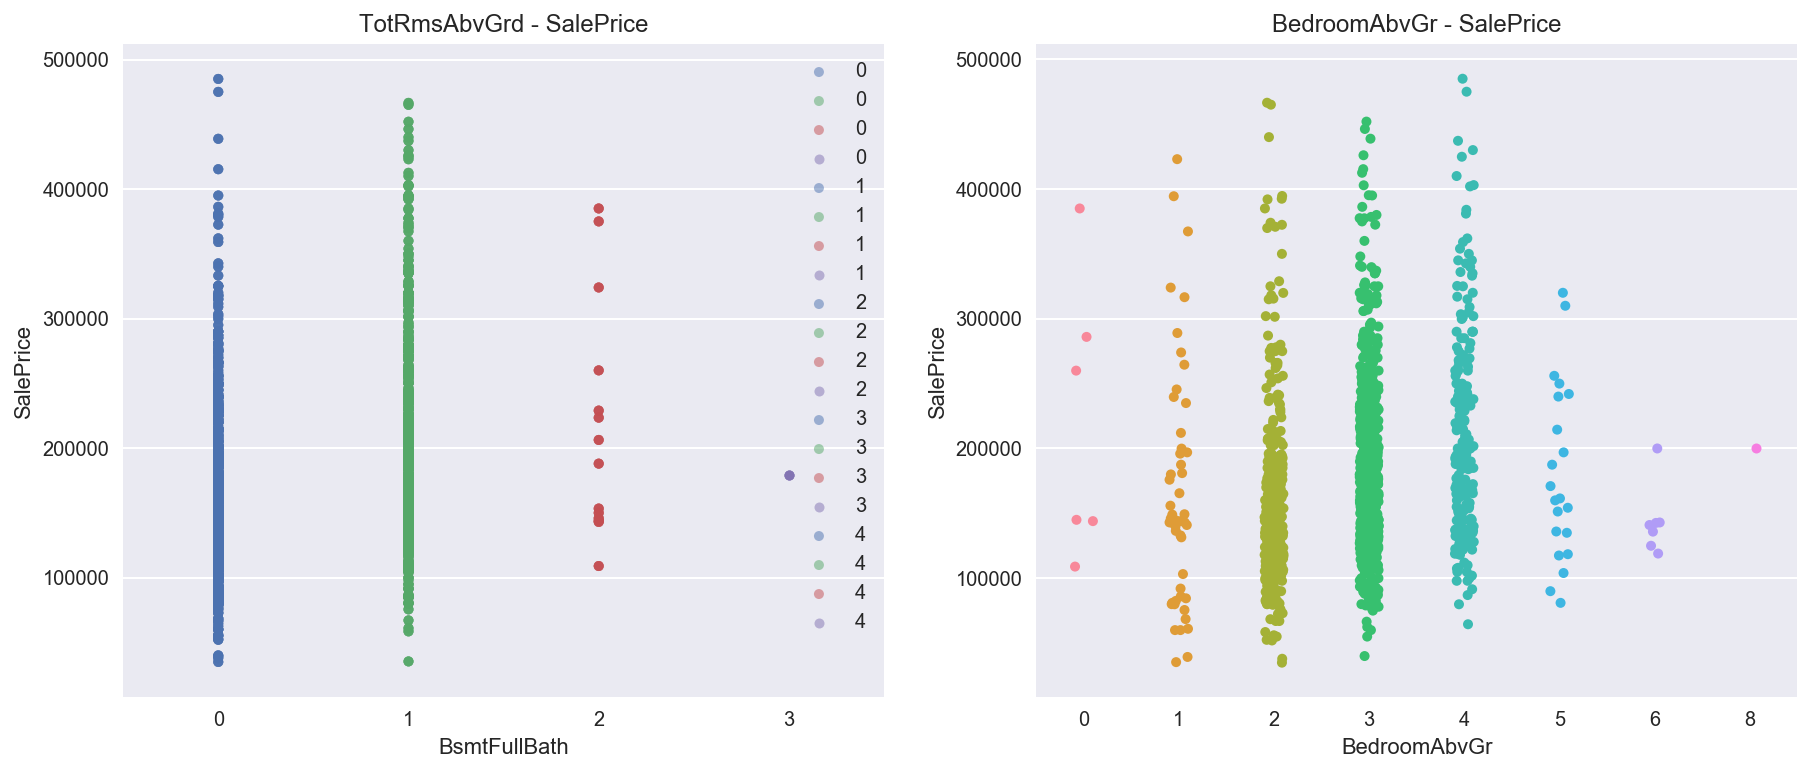

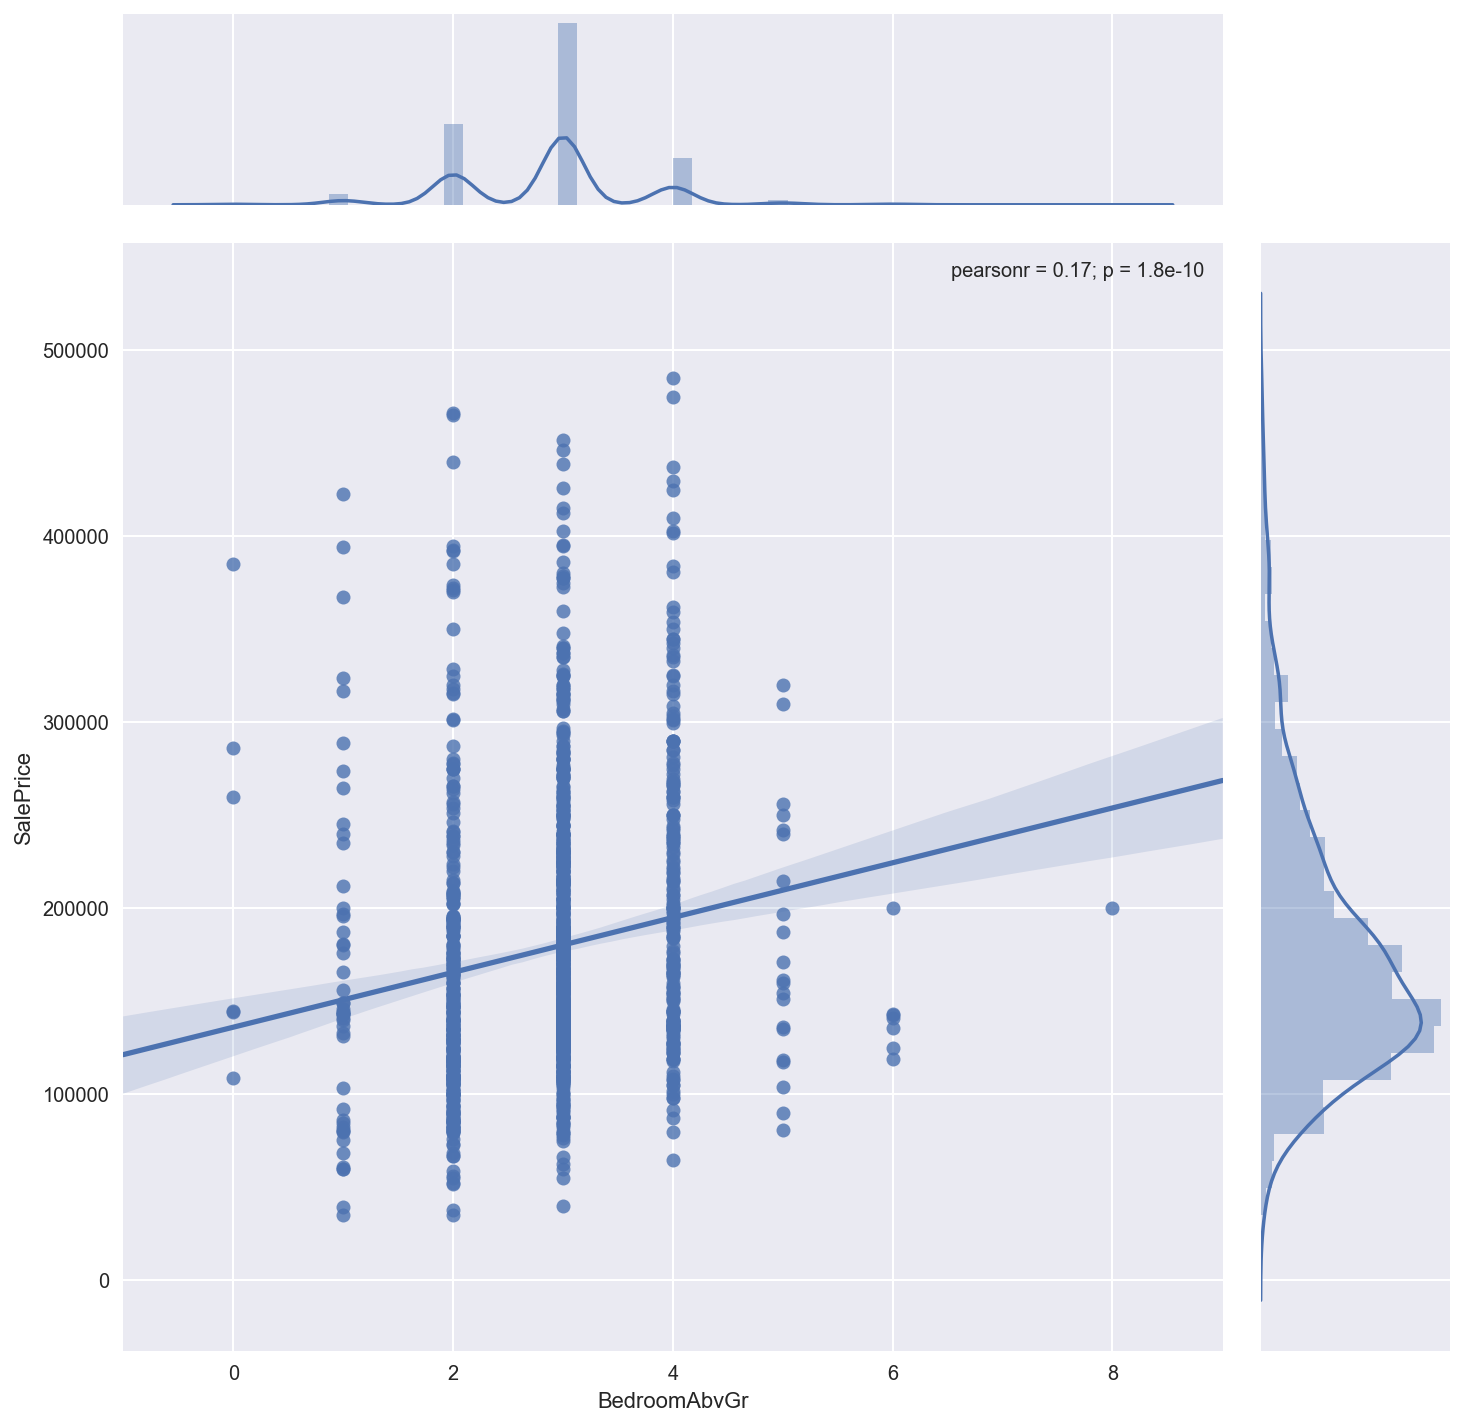

In [33]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for TotRmsAbvGrd in range(0,5):
    index = train.TotRmsAbvGrd == TotRmsAbvGrd
    sns.stripplot(x = train.BsmtFullBath, y = train.SalePrice, data=train,ax = ax1, label=TotRmsAbvGrd, alpha='0.5')

ax1.legend()
ax1.set_title('TotRmsAbvGrd - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "BedroomAbvGr", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('BedroomAbvGr - SalePrice')
ax2.legend()

grid = sns.jointplot(x = "BedroomAbvGr", y = "SalePrice", data=train, kind="reg", size = 10)


plt.show()

Find: 

확실히 TotRmsAbvGrd 는 연관관계가 있는것으로 보임

((array([-3.30301987, -3.04565945, -2.90252966, ...,  2.90252966,
          3.04565945,  3.30301987]), array([0, 0, 0, ..., 6, 6, 8])),
 (0.74975353647715715, 2.8640441683919944, 0.92012923733960694))

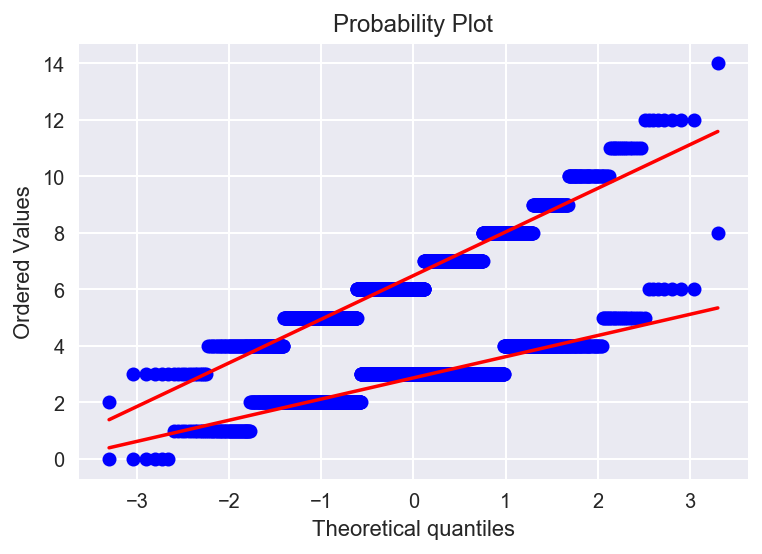

In [34]:
stats.probplot(train["TotRmsAbvGrd"], plot=plt)
stats.probplot(train["BedroomAbvGr"], plot=plt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26351da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c29cec710>]], dtype=object)

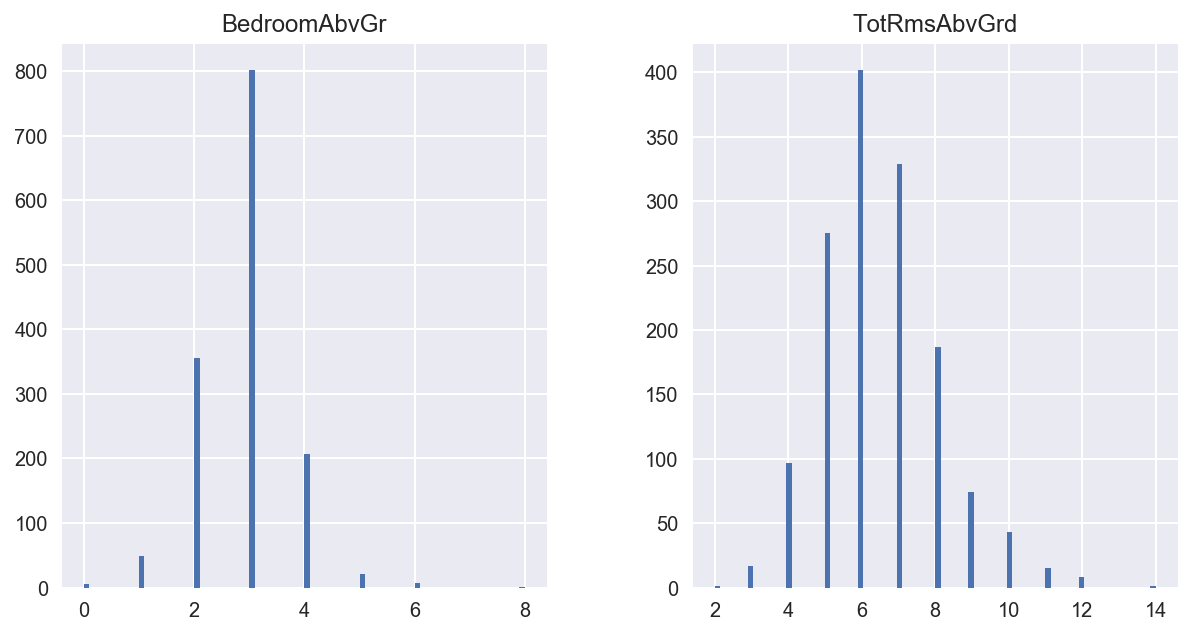

In [35]:
train[['TotRmsAbvGrd', 'BedroomAbvGr']].hist(bins=80, figsize=(10,5))

Tot : 길게 하나 하고, 어떤 방이 여기에 포함되어있는지 확인필요

이런 데이터의 경우에는 확실히 한단계 데이터 조치가 필요할것으로 보임
이런 경우는 어떻게 해야하지?

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### 2-2 Missing Data 처리

3가지 정도의 가설

1. 미싱데이터 80% 이상의 데이터들을 제거했을때
2. 비어있는 값들의 처리를 0 or mean 값으로 한경우
3. one-hot encoding 했을때

In [36]:
ntrain = train.shape[0]
ntest = test.shape[0]

all_data = pd.concat((train, test)).reset_index(drop=True)
print("All data size is {}".format(all_data.shape))

All data size is (2908, 81)


Text(0.5,1,'Percent missing data by features')

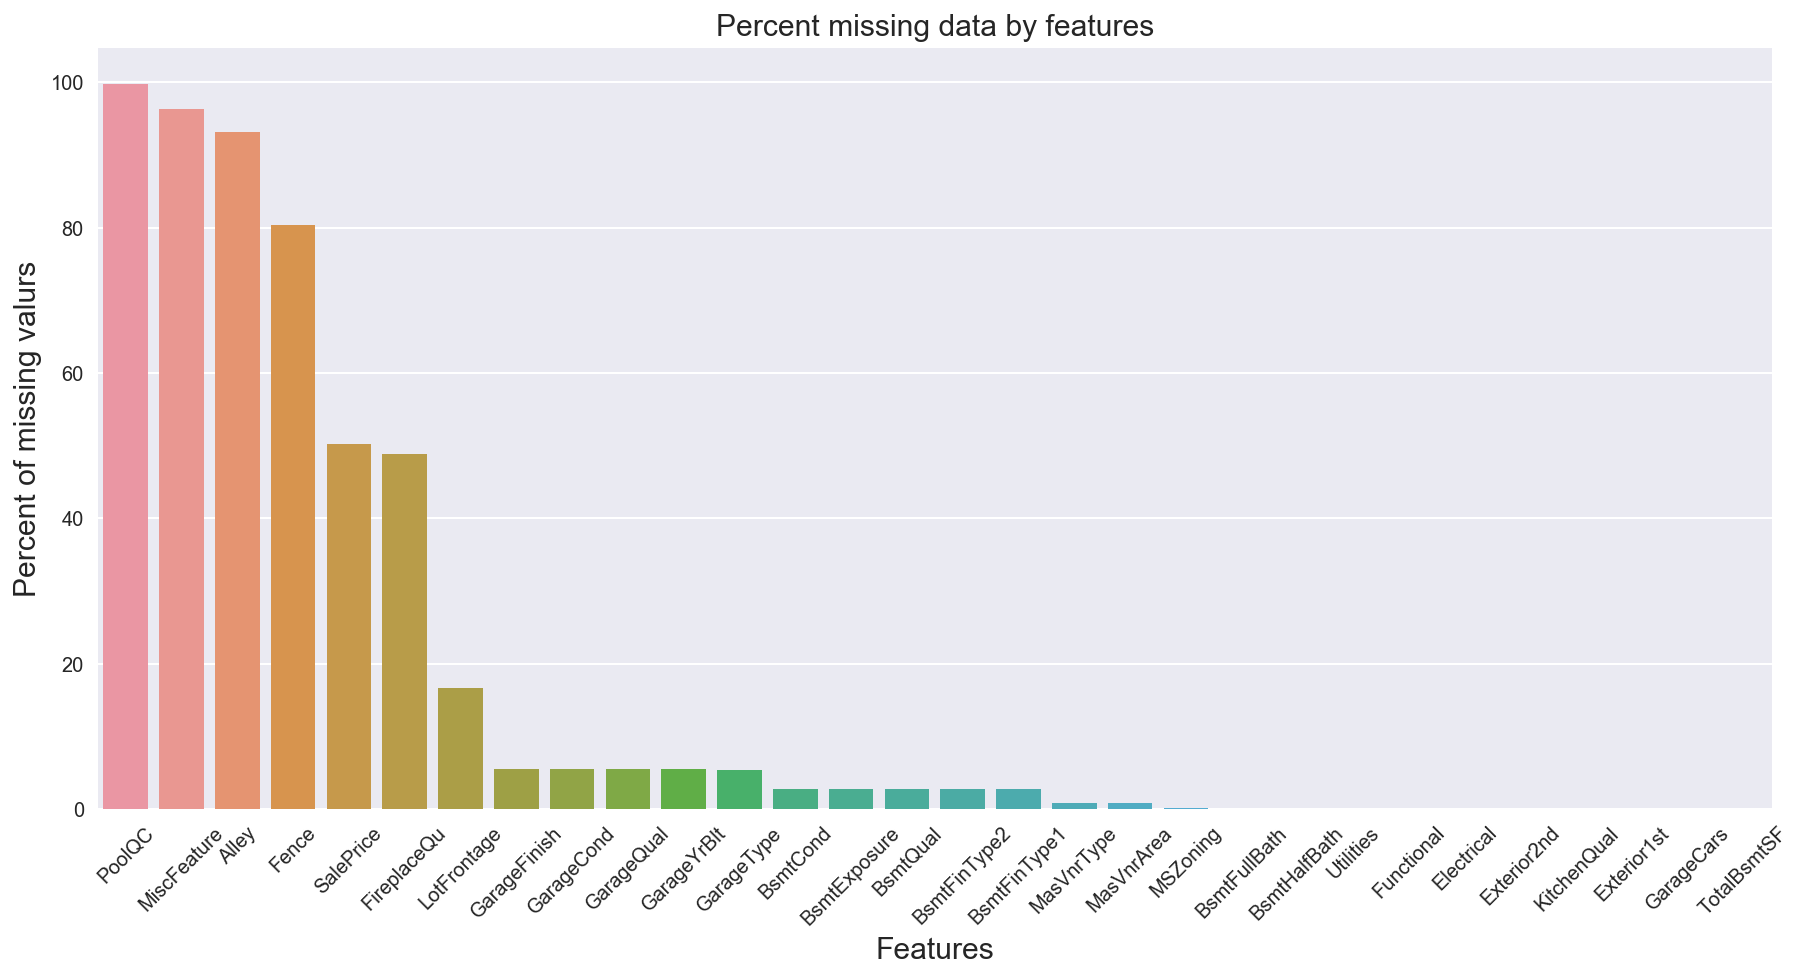

In [37]:
total = all_data.isnull().sum().sort_values(ascending=False)[:30]
ratio = ((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False)[:30]
missing_data = pd.concat([total, ratio], axis=1, keys=['Total', 'Ratio'])


f, ax = plt.subplots(figsize=(15,7))
plt.xticks(rotation='45')
sns.barplot(x=ratio.index, y=ratio)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing valurs', fontsize=15)
plt.title('Percent missing data by features', fontsize=15)

In [38]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

방법 1

In [39]:
feats=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for feat in feats:
    all_data[feat].fillna(0, inplace=True)

In [40]:
# fill in with None
feats1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for feat in feats1:
    all_data[feat].fillna("None", inplace=True)

In [41]:
# fill in with mode
feats2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for feat in feats2:
    all_data[feat].fillna(all_data[feat].mode()[0], inplace=True)

방법 2

In [42]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning']= all_data["MSZoning"].fillna(all_data['MSZoning'].mode()[0])

all_data['Utilities'] = all_data['Utilities'].fillna(all_data['Utilities'].mode()[0])

all_data['Functional']= all_data["Functional"].fillna("Typ")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
all_data["Electrical"] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data["KitchenQual"]=all_data["KitchenQual"].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

all_data = all_data.drop(['Id'], axis=1) # Id 제거

In [43]:
train = all_data[:ntrain]
test = all_data[ntrain:]
y_train = train.SalePrice.values
all_data.drop(['SalePrice'], axis=1, inplace=True)

### 2-3 아웃라이어 제거

##### OLS 를 사용하여 아웃라이어 제거

In [44]:
all_data_dummy = pd.get_dummies(all_data)

In [45]:
all_data_dummy.drop(["SalePrice"], axis=1, inplace=True) 

In [46]:
x_train_x0 = all_data_dummy[:ntrain]

x_train = sm.add_constant(x_train_x0)
x_columns = x_train.columns

x_train1 = np.array(x_train)
y_train1 = np.array(y_train)

In [47]:
#OLS 모델 사용
model = sm.OLS(pd.DataFrame(y_train1, columns=["SalePrice"]),pd.DataFrame(x_train1,columns=x_columns))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     59.89
Date:                Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:07:27   Log-Likelihood:                -16069.
No. Observations:                1449   AIC:                         3.285e+04
Df Residuals:                    1091   BIC:                         3.474e+04
Df Model:                         357                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   3.61e+

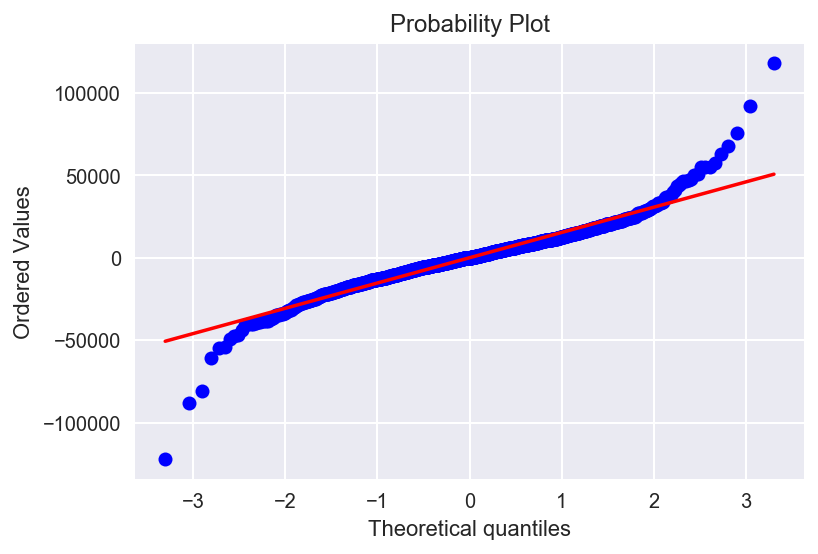

Chi^2       : 217.952
P-value     :  0.000


In [48]:
#잔차 정규성 확인
sp.stats.probplot(result.resid, plot=plt)
plt.show()

#Chi^2 확인
test_chi = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test_chi):
    print("%-12s: %6.3f" % xi)

In [49]:
# 아웃라이어 제거
idx = result.resid_pearson < 2

train = train[idx]

## 3. 변수선정 

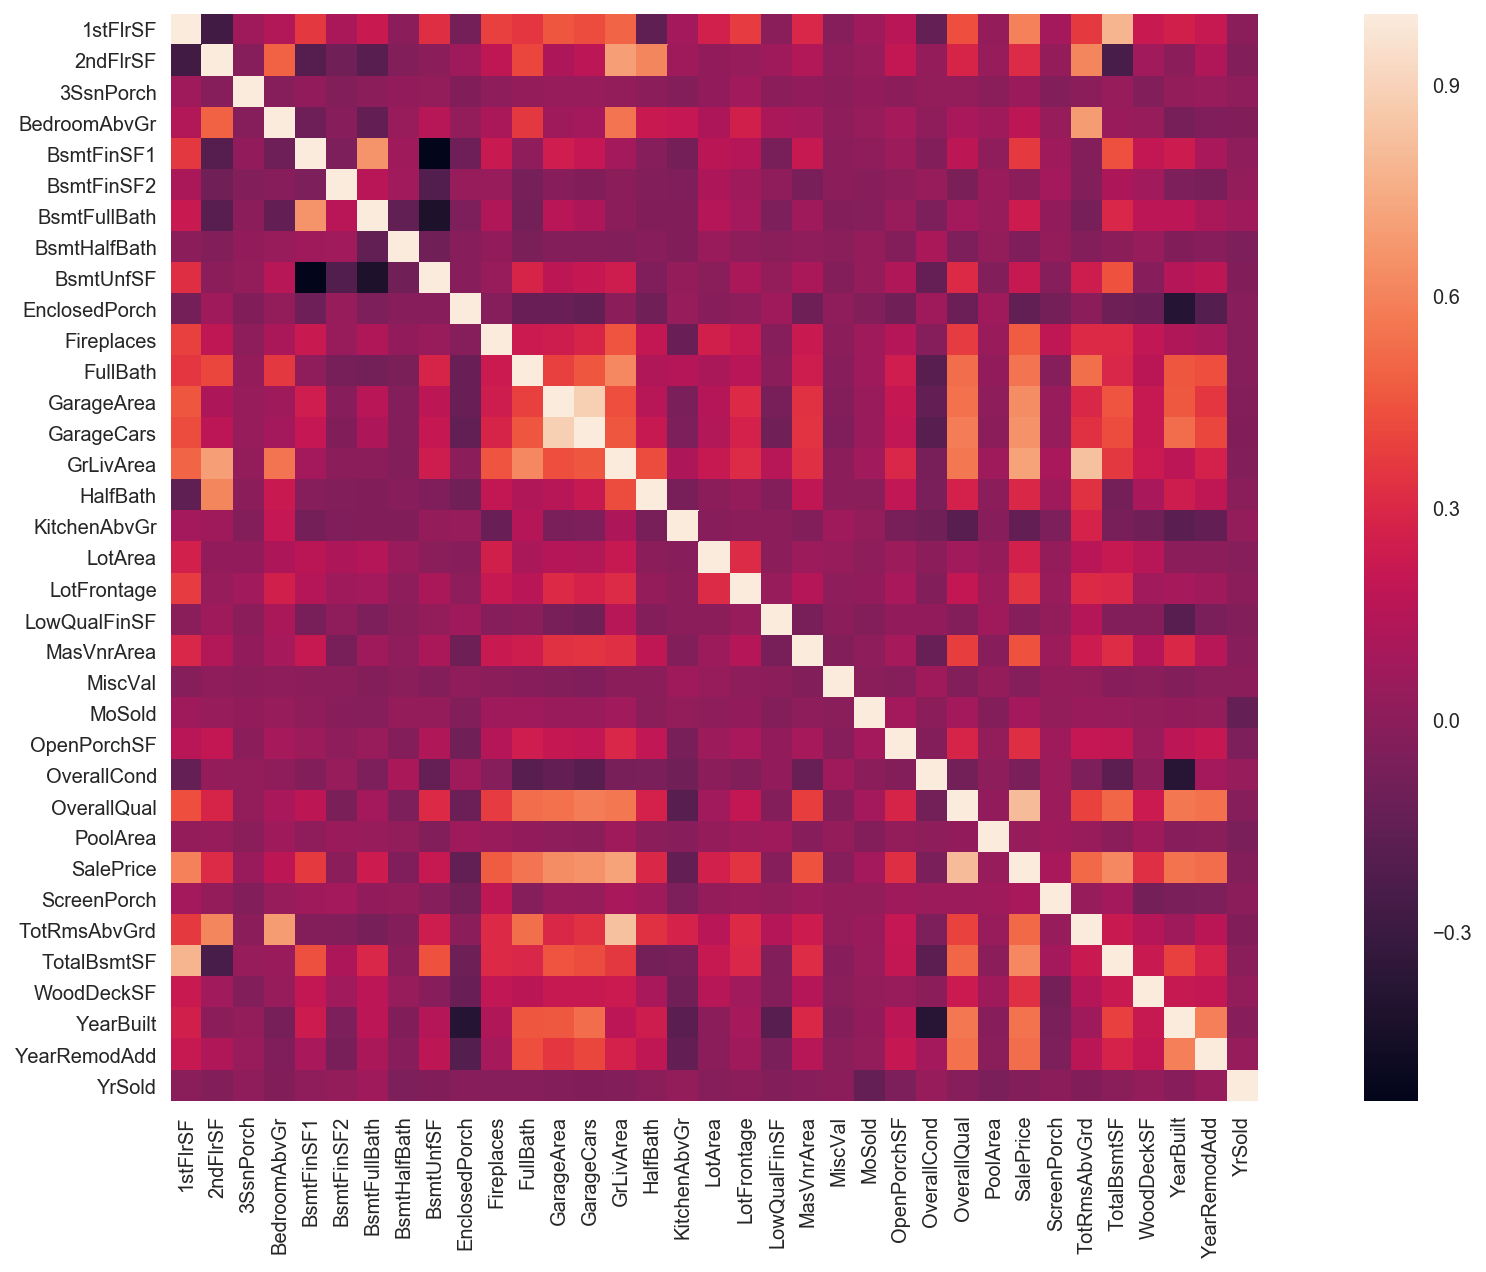

In [50]:
corrmat = train.corr()

f, ax = plt.subplots(figsize = (19,10))
sns.heatmap(corrmat, vmax =1, square = True)

In [51]:
cols=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice']

In [52]:
x_train = train[cols]
x_train.tail()

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  SalePrice
1444            6       1647         2.0        953.0         2   175000.0
1445            6       2073         2.0       1542.0         2   210000.0
1446            7       2340         1.0       1152.0         2   266500.0
1447            5       1078         1.0       1078.0         1   142125.0
1448            5       1256         1.0       1256.0         1   147500.0

## 4. 정규화 & 스케일링

In [53]:
# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)

In [54]:
# scaler = StandardScaler()
# scaler.fit(x_test)
# x_test = scaler.transform(x_test)

In [55]:
# y_ltrain = np.log1p(y_train)

## 5. 교차 검증 및 모델링

In [56]:
# x_train_dummy = pd.get_dummies(x_train)
# x_train_0 = sm.add_constant(x_train_dummy)
# x_columns = x_train_0.columns

# test_dummy = pd.get_dummies(test)
# test_0 = sm.add_constant(test_dummy)
# t_columns = test_0.columns


# x_train_m = np.array(x_train_0)
# test_m = np.array(test_0)
# y_train_m = np.array(y_train)


In [66]:
train.tail()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
1444       953       694          0  None             3     1Fam        6   
1445      2073         0          0  None             3     1Fam        6   
1446      1188      1152          0  None             4     1Fam        8   
1447      1078         0          0  None             2     1Fam        6   
1448      1256         0          0  None             3     1Fam        6   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
1444           No         0.0         0.0  ...         WD           0    Pave   
1445           No       790.0       163.0  ...         WD           0    Pave   
1446           No       275.0         0.0  ...         WD           0    Pave   
1447           Mn        49.0      1029.0  ...         WD           0    Pave   
1448           No       830.0       290.0  ...         WD           0    Pave   

      TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
1444             7       953.0     AllPub          0      1999         2000   
1445             7      1542.0     AllPub        349      1978         1988   
1446             9      1152.0     AllPub          0      1941         2006   
1447             5      1078.0     AllPub        366      1950         1996   
1448             6      1256.0     AllPub        736      1965         1965   

     YrSold  
1444   2007  
1445   2010  
1446   2010  
1447   2010  
1448   2008  

[5 rows x 80 columns]

In [77]:
#OLS 모델 사용

model = sm.OLS.from_formula("np.log1p(SalePrice) ~ scale(OverallQual) + scale(np.log1p(GrLivArea)) + scale(GarageCars) + scale(np.log1p(TotalBsmtSF)) + scale(FullBath) ", data = train)

## 6. 예측하기

In [78]:
result = model.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log1p(SalePrice)   R-squared:                       0.796
Model:                             OLS   Adj. R-squared:                  0.795
Method:                  Least Squares   F-statistic:                     1107.
Date:                 Sun, 11 Mar 2018   Prob (F-statistic):               0.00
Time:                         19:31:53   Log-Likelihood:                 497.69
No. Observations:                 1425   AIC:                            -983.4
Df Residuals:                     1419   BIC:                            -951.8
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Interc

In [116]:
rsquared_adj = result.rsquared_adj

In [98]:
predict = np.exp(result.predict(test))
predict.tail()

2903     93570.778691
2904    104474.860898
2905    140562.629992
2906    102311.390703
2907    241420.849297
dtype: float64

In [105]:
predict1 = pd.Series(predict)

In [114]:
submission = pd.read_csv("../1_House_Price_Project_X/Submit/sample_submission.csv")
submission.tail()

submission["SalePrice"] = predict1.values

print(submission.shape)
submission.head()

(1459, 2)


Id      SalePrice
0  1461  110773.922365
1  1462  146079.245859
2  1463  158710.848781
3  1464  177036.442571
4  1465  207278.540098

In [117]:
submission.to_csv("../1_House_Price_Project_X/Submit/Score_{0:.5f}_submission.csv".format(rsquared_adj), index=False)

score : 0.18836

3113 / 4396 = 70.8%